#All sequence was run through the FastQC -> HiSAT2 -> FeatureCounts pipeline, with NAM5 genome, using CYVERSE Atmosphere computing environment. 
#All programs were run with the PE settings 
#NOTES: most alignments were >85%
 featureCounts read assignment was gerally over 65%,
 Downloaded the featurecounts .txt files from CYVERSE using cyberduck 

In [92]:
library(DESeq2)

In [93]:
# Set the working directory 
setwd('/Users/aricha14/Documents/Research_Projects/TRF_Project/RNAseq/Shoot_apex_RNAseq_July2019_HiSAT2_Aligned_NAM5')
directory <- "./featureCounts_v5_PE"
list.files(directory)

[1] "TRF_M1_B73v5.counts.txt" "TRF_M2_B73v5.counts.txt"
[3] "TRF_M3_B73v5.counts.txt" "TRF_N1_B73v5.counts.txt"
[5] "TRF_N2_B73v5.counts.txt" "TRF_N3_B73v5.counts.txt"

In [94]:
# Define the paths to the read files 
file_names <- list.files(path=directory, pattern = "*.txt") # create a list of all txt files in the "Tassel_stage1_counts" folder
file_paths <- list.files(path=directory, pattern = "*.txt", full.names=T) # create a list of all txt files' full locations
print(file_names)
print(file_paths)

[1] "TRF_M1_B73v5.counts.txt" "TRF_M2_B73v5.counts.txt"
[3] "TRF_M3_B73v5.counts.txt" "TRF_N1_B73v5.counts.txt"
[5] "TRF_N2_B73v5.counts.txt" "TRF_N3_B73v5.counts.txt"
[1] "./featureCounts_v5_PE/TRF_M1_B73v5.counts.txt"
[2] "./featureCounts_v5_PE/TRF_M2_B73v5.counts.txt"
[3] "./featureCounts_v5_PE/TRF_M3_B73v5.counts.txt"
[4] "./featureCounts_v5_PE/TRF_N1_B73v5.counts.txt"
[5] "./featureCounts_v5_PE/TRF_N2_B73v5.counts.txt"
[6] "./featureCounts_v5_PE/TRF_N3_B73v5.counts.txt"


In [95]:
# Building the counts table 
featureCounts <- read.table(file_paths[1], sep="\t", header=T) # start by reading the first file
#look at the first first file
dim(featureCounts)
head(featureCounts, 10)

[1] 39756     7

,Geneid,Chr,Start,End,Strand,Length,..aligned_reads_v5.TRF_M1_B73v5.bam
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,Zm00001eb000010,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,34617;36037;36259;36600;36822;37416;38021;38571;39701,35318;36174;36504;36713;37004;37633;38482;39618;40204,+;+;+;+;+;+;+;+;+,3615,792
2,Zm00001eb000020,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,41214;41214;41263;41314;41742;41742;41742;41742;42257;42257;42257;42508;42508;42508;42508;42762;42762;42762;42762;43039;43039;43039;43039;43318;43318;43318;43318;43750;43750;43994;43994;43994;45593;45593;45593,41588;41588;41588;41588;41807;42375;41807;41807;42375;42375;42375;42665;42665;42665;42665;42917;42917;42917;42917;43197;43197;43197;43197;43520;43520;43520;43520;43802;43902;44303;44303;44303;46039;46050;46762,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,3318,6491
3,Zm00001eb000050,chr1;chr1;chr1;chr1;chr1;chr1;chr1,108554;109172;109340;109498;109706;109882;113762,108564;109264;109411;109622;109790;109951;114382,-;-;-;-;-;-;-,1077,3
4,Zm00001eb000060,chr1;chr1,188559;189146,189088;189581,-;-,966,709
5,Zm00001eb000070,chr1;chr1;chr1;chr1;chr1;chr1,190192;190301;190624;191350;197313;198535,190199;190561;190681;191442;197368;198832,-;-;-;-;-;-,774,22
6,Zm00001eb000080,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,200262;200916;201124;201433;201662;201912;202483;203022;203302,200810;201043;201211;201571;201838;202158;202592;203229;203393,-;-;-;-;-;-;-;-;-,1738,1118
7,Zm00001eb000100,chr1;chr1;chr1;chr1;chr1;chr1,206619;207090;207447;207679;208377;209221,206995;207244;207582;207819;208969;209723,-;-;-;-;-;-,1905,0
8,Zm00001eb000110,chr1;chr1,246422;246997,246545;247242,-;-,370,0
9,Zm00001eb000120,chr1,315219,315846,+,628,21


In [96]:
featureCounts <- read.table(file_paths[1], sep="\t", header=T) # start by reading the first file
counts <- cbind(featureCounts[,7]) # take the 7th column (counts)
rownames(counts) <- featureCounts[,1] # name by gene

colnames(counts) <- c(file_names[1]) # name the first column

head(counts) # check on the data
dim(featureCounts) # before
dim(counts) # after

,TRF_M1_B73v5.counts.txt
Zm00001eb000010,792
Zm00001eb000020,6491
Zm00001eb000050,3
Zm00001eb000060,709
Zm00001eb000070,22
Zm00001eb000080,1118


[1] 39756     7

[1] 39756     1

In [97]:


for (f in 2:length(file_paths)) { # loop over all the rest of the files
	new_featureCounts <- read.table(file_paths[f],sep="\t", header=T)
	print ("Merging file...")
	counts <- cbind(counts, new_featureCounts[,7]) # add on the new column
	colnames(counts) <- c(file_names[1:f]) # add on the new column's name
}


[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."


In [98]:
# View the raw counts table 
head(counts)

,TRF_M1_B73v5.counts.txt,TRF_M2_B73v5.counts.txt,TRF_M3_B73v5.counts.txt,TRF_N1_B73v5.counts.txt,TRF_N2_B73v5.counts.txt,TRF_N3_B73v5.counts.txt
Zm00001eb000010,792,578,482,671,755,609
Zm00001eb000020,6491,5535,4863,4775,5094,4542
Zm00001eb000050,3,0,0,0,0,1
Zm00001eb000060,709,561,493,479,754,548
Zm00001eb000070,22,21,39,22,18,50
Zm00001eb000080,1118,939,945,1100,1476,1102


In [99]:
# make the sample table. NOTE: the table order must match the order that the above counts table is in
sampleTable <- read.table (text = "File,Geno
TRF_M1_B73v5.counts.txt,MUT
TRF_M2_B73v5.counts.txt,MUT
TRF_M3_B73v5.counts.txt,MUT
TRF_N1_B73v5.counts.txt,N
TRF_N2_B73v5.counts.txt,N
TRF_N3_B73v5.counts.txt,N",  sep=",", header=T)

In [100]:
#create dds object using matrix import command
# use straight forward equation for the model as we only have one variable (genotype)
ddsMatrix <- DESeqDataSetFromMatrix(countData=counts, 
                              colData=sampleTable, 
                              design=~Geno)
ddsMatrix


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 39756 6 
metadata(1): version
assays(1): counts
rownames(39756): Zm00001eb000010 Zm00001eb000020 ... Zm00001eb443020
  Zm00001eb443030
rowData names(0):
colnames(6): TRF_M1_B73v5.counts.txt TRF_M2_B73v5.counts.txt ...
  TRF_N2_B73v5.counts.txt TRF_N3_B73v5.counts.txt
colData names(2): File Geno

In [101]:
#convert into DESeq object -- will estimate dispersion
dds <- DESeq (ddsMatrix)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



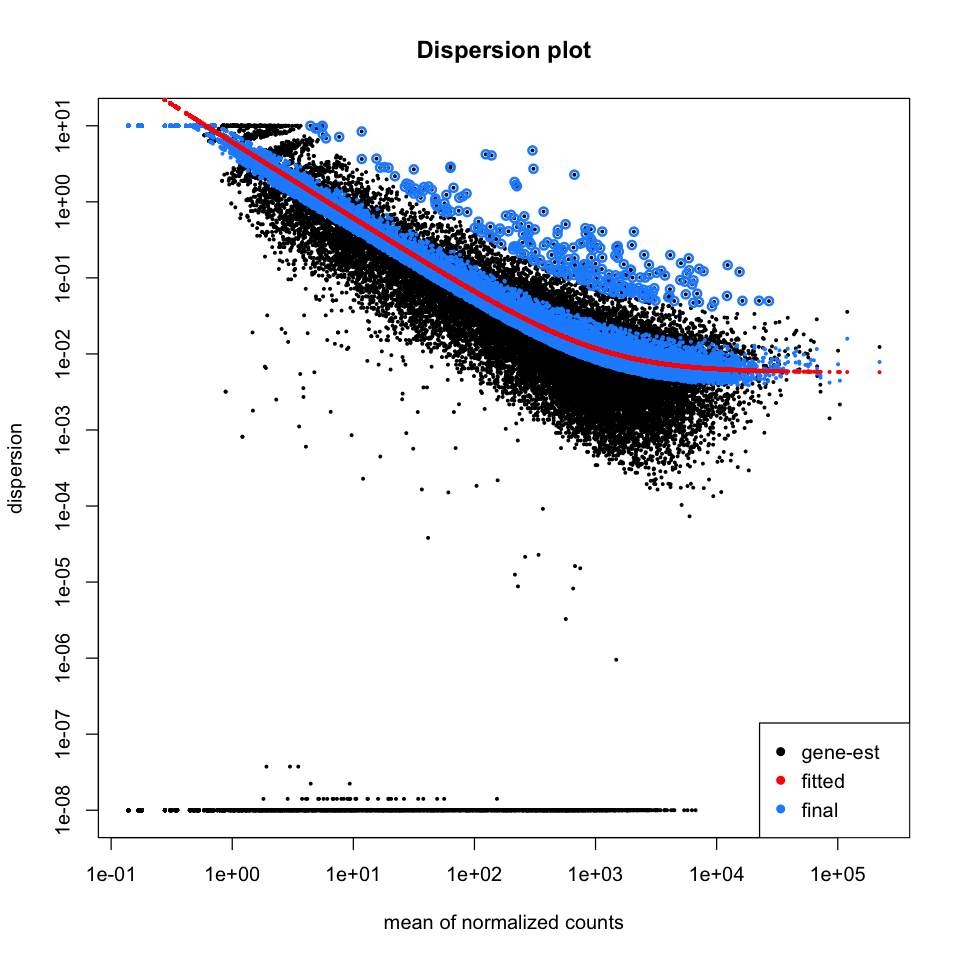

In [102]:
options(repr.plot.width=8, repr.plot.height=8)
plotDispEsts(dds, main="Dispersion plot")
#The dispersion plot shows you the quality of the sequencing. In an ideal situation the reads will show a normal 
#distribution, this the fitted model line. If the sequencing runs all exactly captured this faithfully, the distirbution 
#would be very close to the red. 
#The black dots at the bottom suggest tha there are annotated genes in the genome that are never observed as expressed


In [103]:
#create variance stabilized table as internal norm
vsd <- varianceStabilizingTransformation(dds)
vsd_filtered <- assay(vsd)

using ntop=1e+05 top features by variance

using ntop=10000 top features by variance



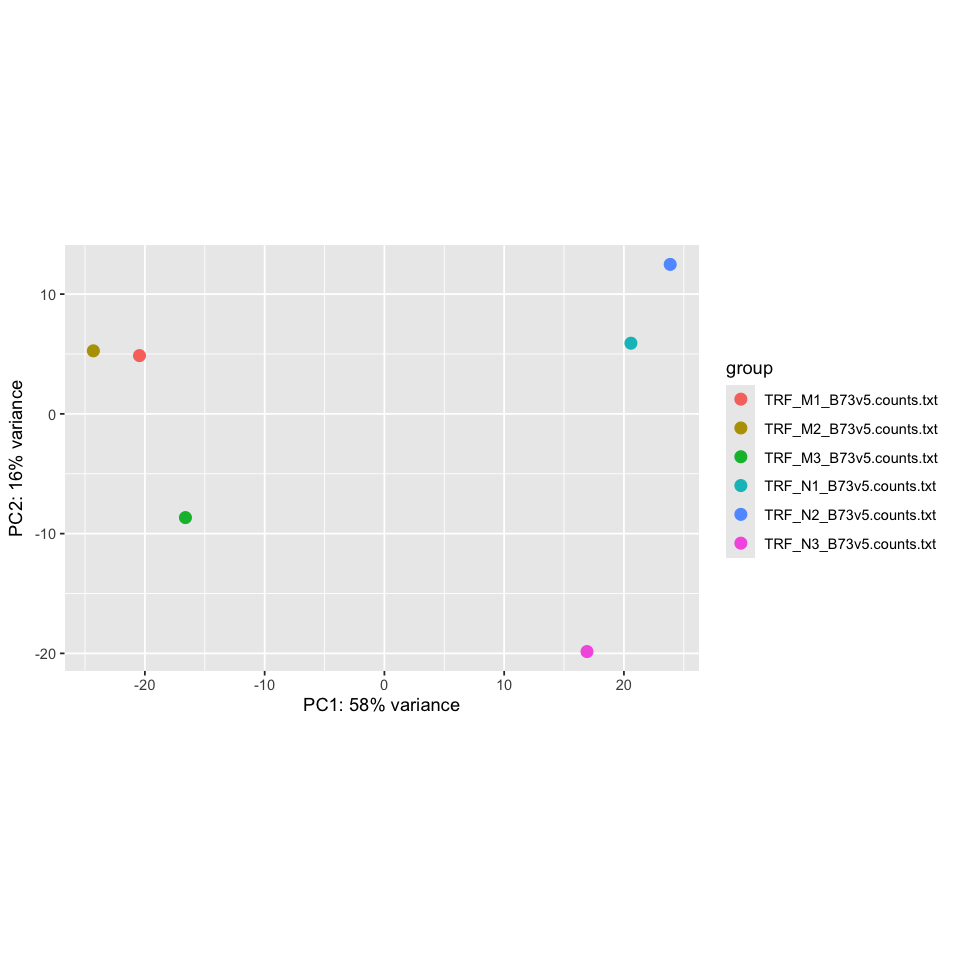

using ntop=1000 top features by variance



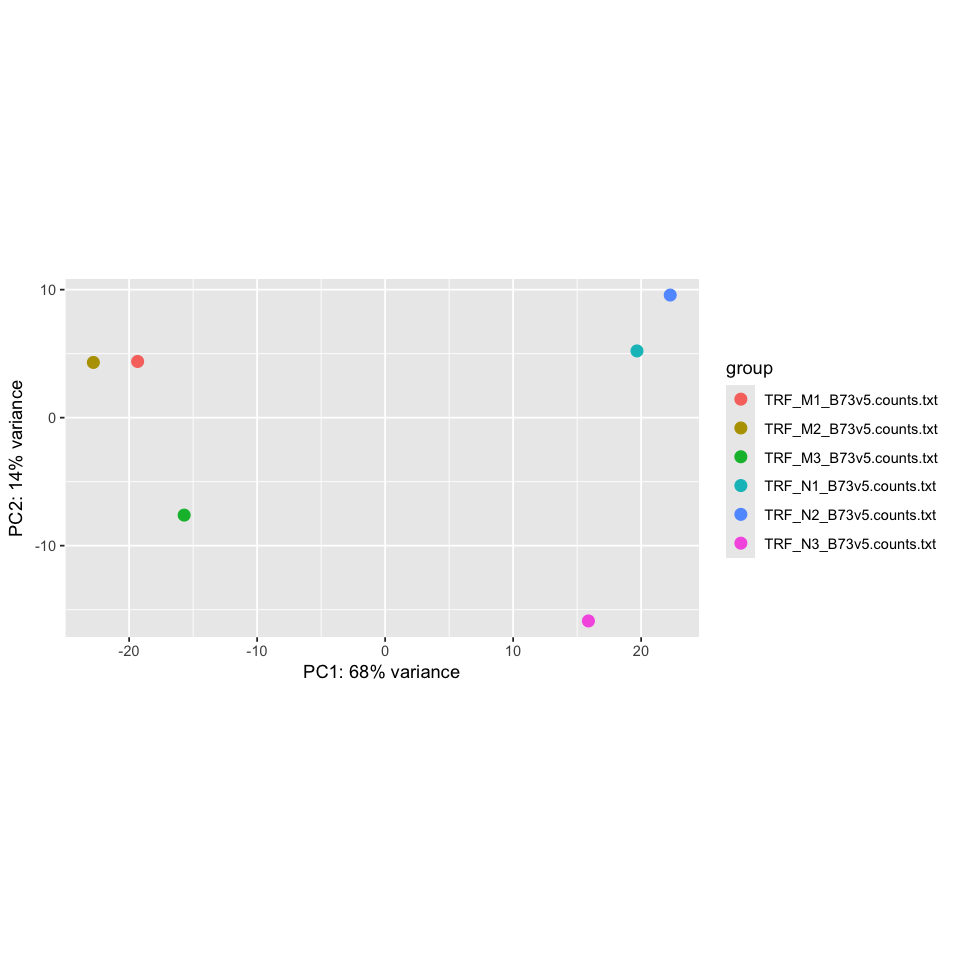

using ntop=100 top features by variance



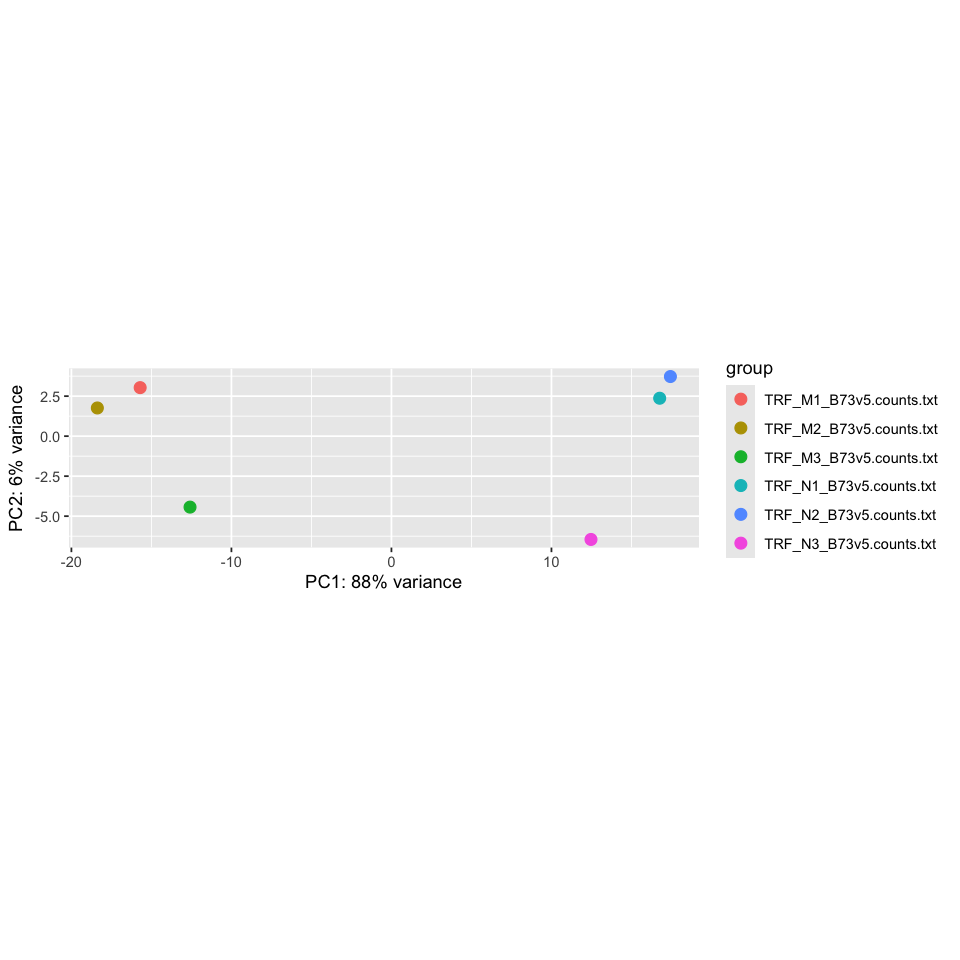

using ntop=10 top features by variance



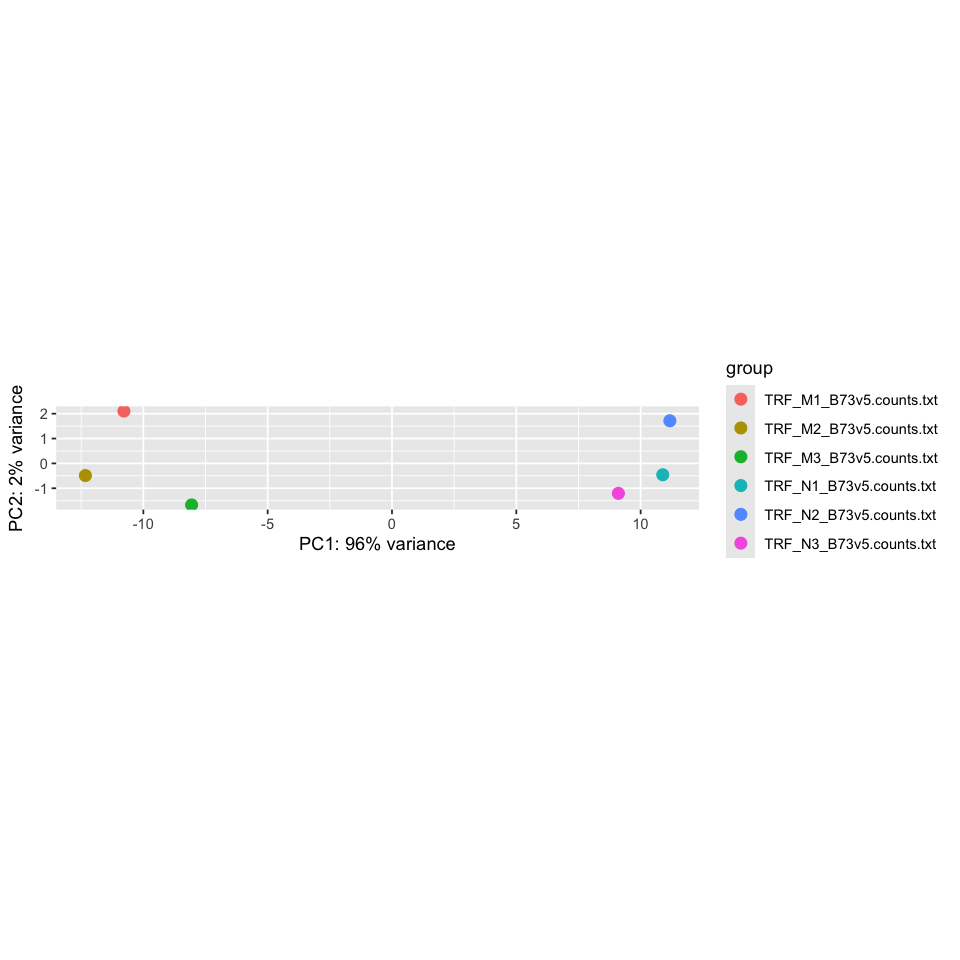

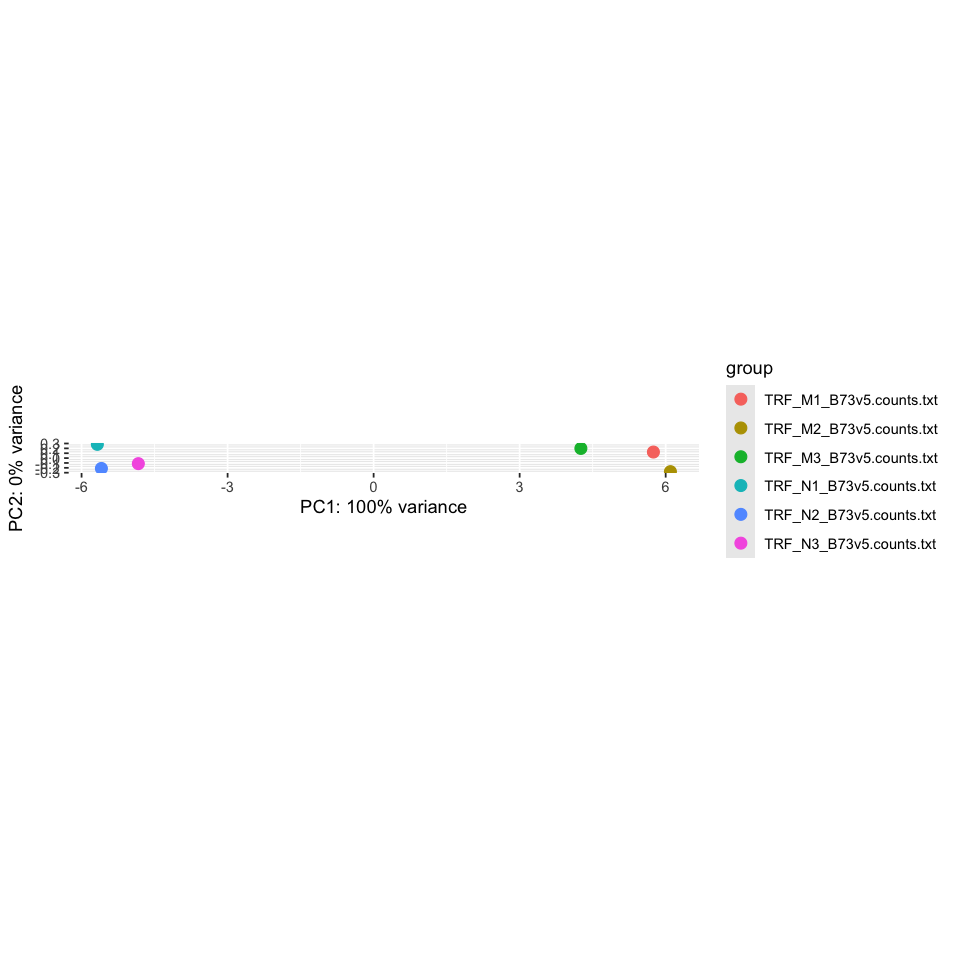

In [104]:
#check PCA plot at a few different levels
plotPCA(vsd, intgroup='File', ntop=100000)
plotPCA(vsd, intgroup='File', ntop=10000)
plotPCA(vsd, intgroup='File', ntop=1000)
plotPCA(vsd, intgroup='File', ntop=100)
plotPCA(vsd, intgroup='File', ntop=10)
#

using ntop=1e+05 top features by variance

using ntop=10000 top features by variance



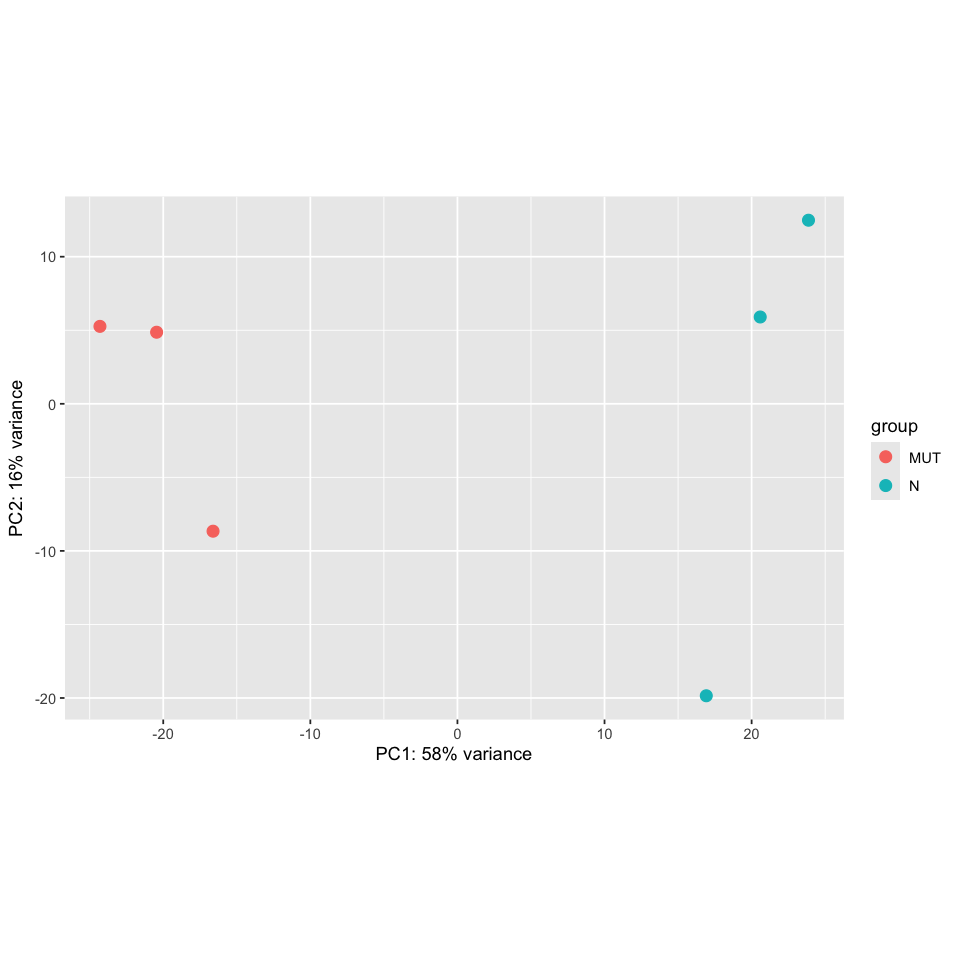

using ntop=1000 top features by variance



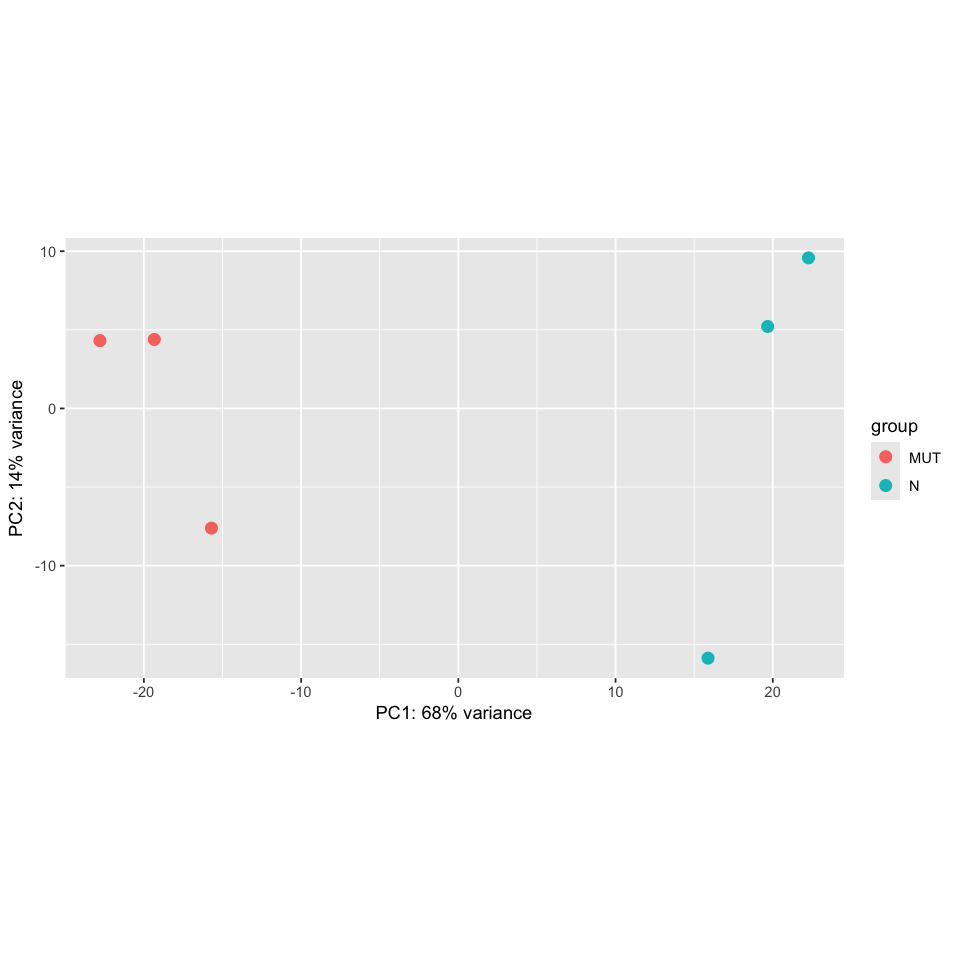

using ntop=100 top features by variance



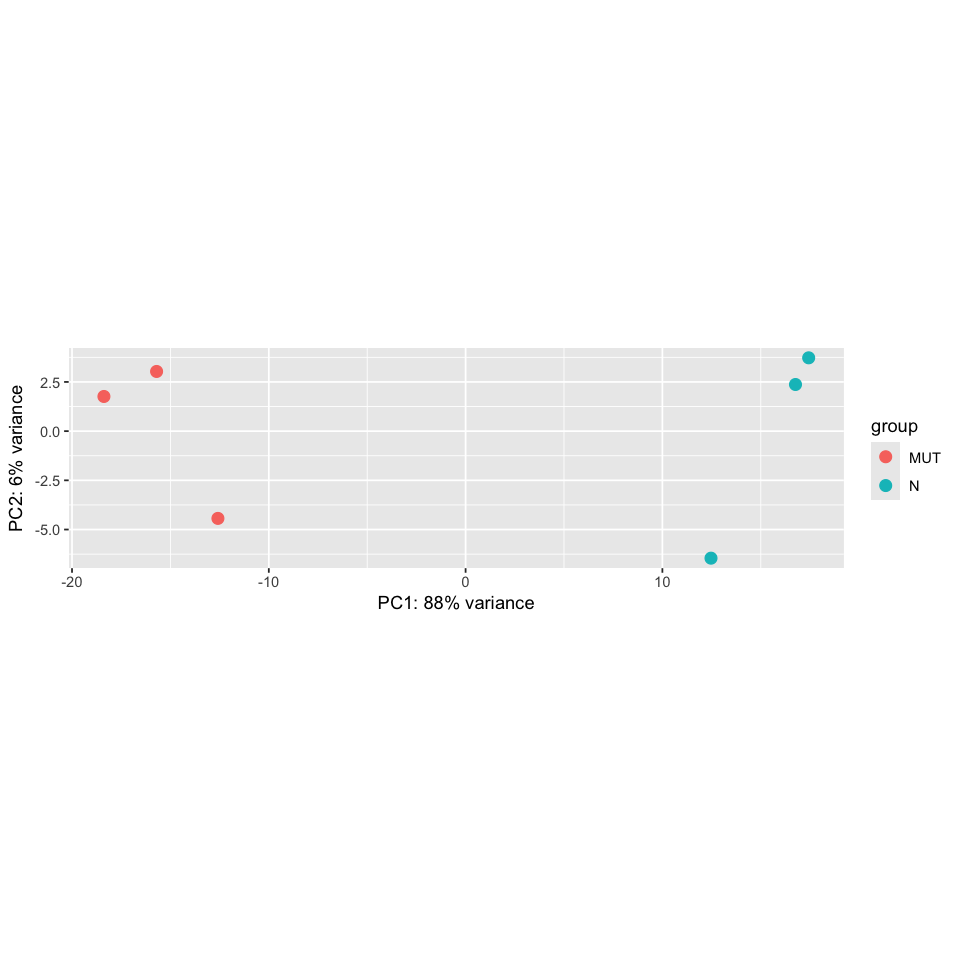

using ntop=10 top features by variance



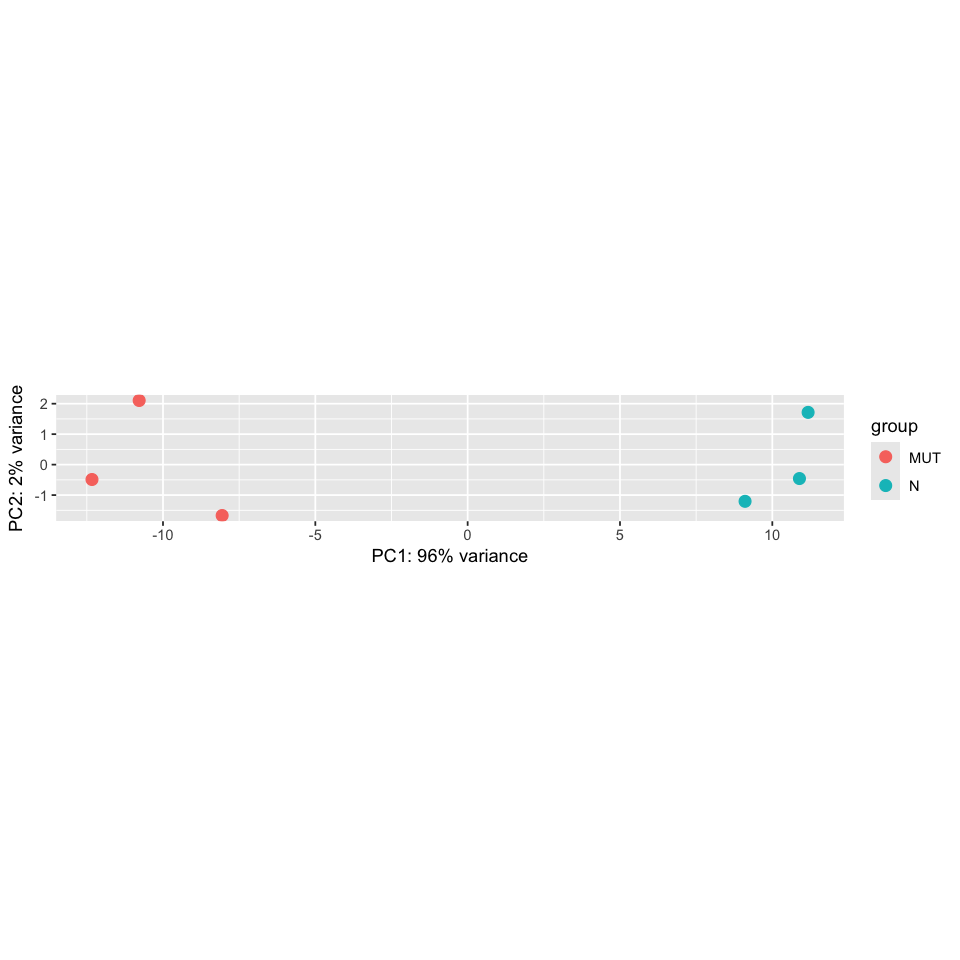

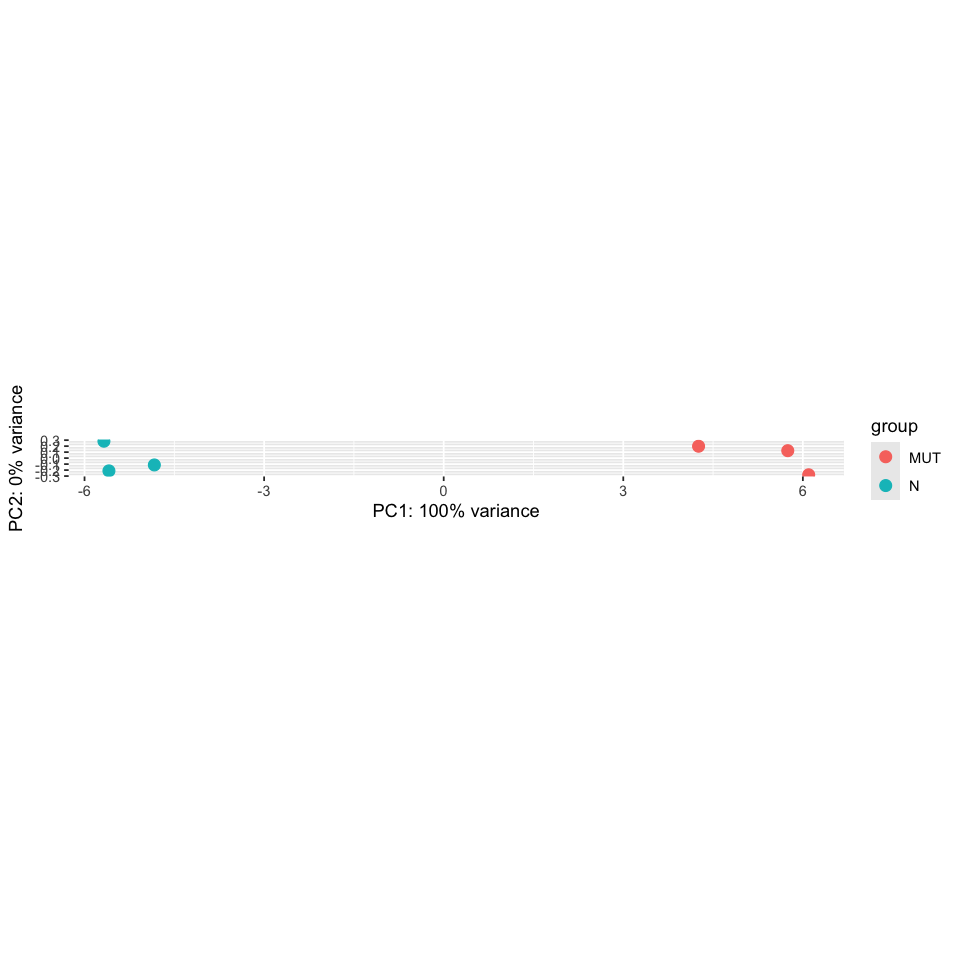

In [105]:
#check PCA plot at a few different levels, colour by genotype
plotPCA(vsd, intgroup='Geno', ntop=100000)
plotPCA(vsd, intgroup='Geno', ntop=10000)
plotPCA(vsd, intgroup='Geno', ntop=1000)
plotPCA(vsd, intgroup='Geno', ntop=100)
plotPCA(vsd, intgroup='Geno', ntop=10)
#

The samples are separating by genotype well

In [106]:
#filtering for minimum read number 
dds <- dds[ rowSums(counts(dds, normalized=TRUE) >= 5) > 3, ] #only consider detected genes, >= 5 RPM in more than 3 replicates



out of 25173 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 1852, 7.4%
LFC < 0 (down)     : 1104, 4.4%
outliers [1]       : 2, 0.0079%
low counts [2]     : 977, 3.9%
(mean count < 11)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



log2 fold change (MLE): Geno MUT vs N 
Wald test p-value: Geno MUT vs N 
DataFrame with 25173 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
Zm00001eb000010   644.312     -0.2978495 0.1524730 -1.953458 0.050765398
Zm00001eb000020  5173.485      0.0775994 0.0908019  0.854601 0.392771831
Zm00001eb000060   586.721     -0.1672656 0.1692927 -0.988026 0.323139989
Zm00001eb000070    28.868     -0.2532563 0.5840877 -0.433593 0.664584065
Zm00001eb000080  1114.974     -0.4393352 0.1314970 -3.341030 0.000834682
...                   ...            ...       ...       ...         ...
Zm00001eb434530  1091.569      0.0528339  0.142406  0.371010  0.71063036
Zm00001eb434540   129.376      0.2097554  0.280896  0.746737  0.45522220
Zm00001eb434550  3124.054     -0.4005625  0.105429 -3.799361  0.00014507
Zm00001eb434560  1025.013     -0.0887812  0.134421 -0.660470  0.50895197
Zm00001eb43

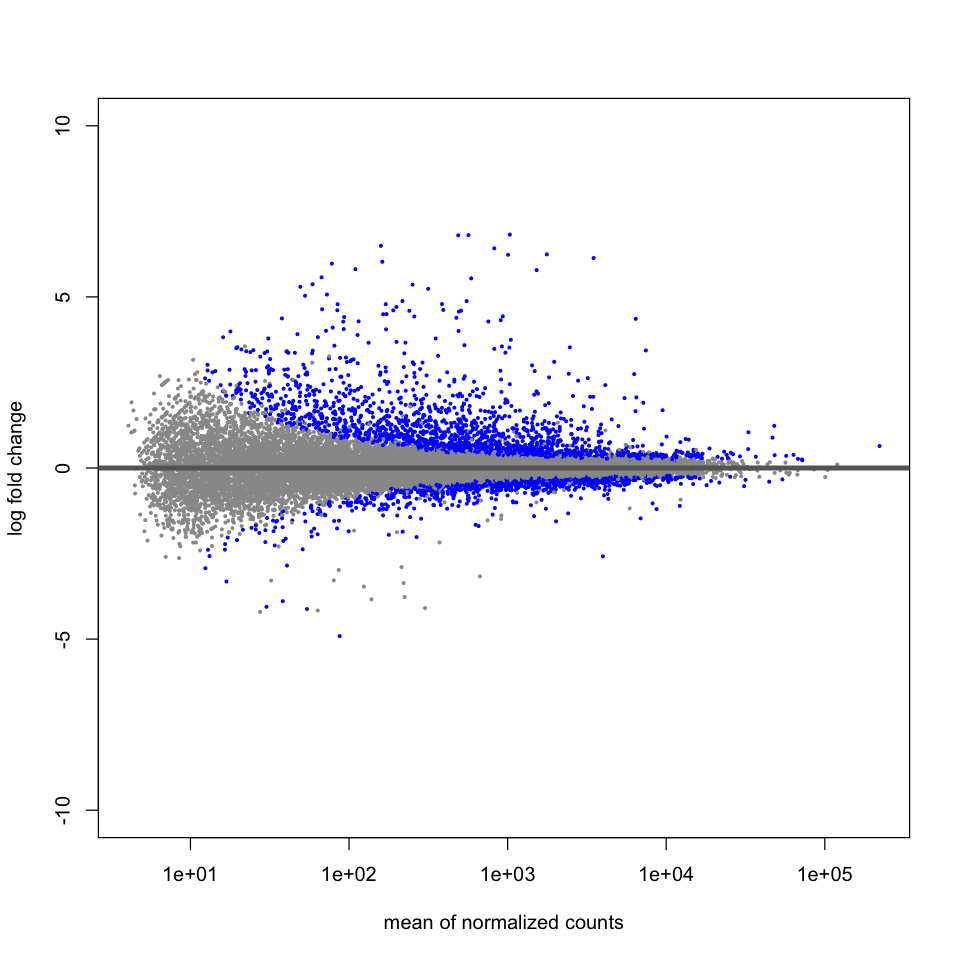

In [107]:
# Compare the mutants to N, and report genes that have padj<0.05. 
# This contrast should report negative log2FC if expression is down in the mutant 
res <- results(dds, contrast=c("Geno","MUT","N"), alpha=0.05)
summary(res); #summary
plotMA(res,ylim=c(-10,10)); #smearplot
res

In [108]:
# filter res to sigDE genes only 
dim(res)
sigDE <- subset (res, padj<0.05)
dim(sigDE) 
"significantly DE genes padj<0.05"

sigDE_1logFC <- subset (sigDE, log2FoldChange<  -1 | log2FoldChange>1)
dim(sigDE_1logFC) 
"significantly DE genes padj<0.05, with log2FC <-1 or >1"

sigDE_5logFC <- subset (sigDE, log2FoldChange<  -0.5 | log2FoldChange>0.5)
dim(sigDE_5logFC) 
"significantly DE genes padj<0.05, with log2FC <-0.5 or >0.5"

#export as TSV
write.table(as.data.frame(res), 
            file="./TrfvsN_Shoot_apex_RNAseq_NAM5_may2022.txt",
            sep="\t", quote=F)
write.table(as.data.frame(sigDE), 
            file="./TrfvsN_Shoot_apex_RNAseq_sigDE_NAM5_may2022.txt",
            sep="\t", quote=F)
write.table(as.data.frame(sigDE_1logFC), 
            file="./TrfvsN_Shoot_apex_RNAseq_sigDE_log2FC1_NAM5_may2022.txt",
            sep="\t", quote=F)


[1] 25173     6

[1] 2956    6

[1] "significantly DE genes padj<0.05"

[1] 924   6

[1] "significantly DE genes padj<0.05, with log2FC <-1 or >1"

[1] 1804    6

[1] "significantly DE genes padj<0.05, with log2FC <-0.5 or >0.5"

In [109]:
write.table(as.data.frame(sigDE_5logFC), 
            file="./TrfvsN_Shoot_apex_RNAseq_sigDE_log2FC0.5_NAM5_may2022.txt",
            sep="\t", quote=F)

In [110]:
DOWN <- subset (sigDE_1logFC, log2FoldChange<  -1 )
UP <- subset (sigDE_1logFC, log2FoldChange>  1 )
"DOWN"
dim(DOWN) 
"UP"
dim(UP) 
"significantly DE genes padj<0.05, with log2FC <-1 or >1"



[1] "DOWN"

[1] 122   6

[1] "UP"

[1] 802   6

[1] "significantly DE genes padj<0.05, with log2FC <-1 or >1"

In [111]:
DOWN <- subset (sigDE_5logFC, log2FoldChange<  0 )
UP <- subset (sigDE_5logFC, log2FoldChange>  0 )
"DOWN"
dim(DOWN) 
"UP"
dim(UP) 
"significantly DE genes padj<0.05, with log2FC <-0.5 or >0.5"


[1] "DOWN"

[1] 455   6

[1] "UP"

[1] 1349    6

[1] "significantly DE genes padj<0.05, with log2FC <-0.5 or >0.5"

In [112]:
#Create normalised counts file 

FPM <- fpm(dds, robust=T) #use the DESeq2 fpm() command
head(counts) #compare raw counts
head(FPM) #to normalized FPMs

#find out transcript lengths
featureCounts <- read.table(file_paths[1], sep="\t", header=T) # start by reading the first file
transcript_lengths <- cbind(featureCounts[,6]) # take the 6th column (bp lengths)
rownames(transcript_lengths) <- sub("gene:", "", featureCounts[,1]) # name by gene

head(transcript_lengths)

# need to divide FPM by matching transcript lengths / 1000 so set up table for this 

FPM_rownames <- rownames(transcript_lengths) %in% rownames(FPM) #find rownames that are in the final FPM table
subset_transcripts <- transcript_lengths[FPM_rownames,] #take the transcript length

head(subset_transcripts)

,TRF_M1_B73v5.counts.txt,TRF_M2_B73v5.counts.txt,TRF_M3_B73v5.counts.txt,TRF_N1_B73v5.counts.txt,TRF_N2_B73v5.counts.txt,TRF_N3_B73v5.counts.txt
Zm00001eb000010,792,578,482,671,755,609
Zm00001eb000020,6491,5535,4863,4775,5094,4542
Zm00001eb000050,3,0,0,0,0,1
Zm00001eb000060,709,561,493,479,754,548
Zm00001eb000070,22,21,39,22,18,50
Zm00001eb000080,1118,939,945,1100,1476,1102


,TRF_M1_B73v5.counts.txt,TRF_M2_B73v5.counts.txt,TRF_M3_B73v5.counts.txt,TRF_N1_B73v5.counts.txt,TRF_N2_B73v5.counts.txt,TRF_N3_B73v5.counts.txt
Zm00001eb000010,19.0760588,16.8328113,14.1520887,20.8084707,22.5679918,18.2202643
Zm00001eb000020,156.3417899,161.1930981,142.7834175,148.0781634,152.2666892,135.8890648
Zm00001eb000060,17.0769264,16.3377286,14.4750617,14.8543330,22.5381004,16.3952460
Zm00001eb000070,0.5298905,0.6115727,1.1450860,0.6822449,0.5380448,1.4959166
Zm00001eb000080,26.9280729,27.3460378,27.7463149,34.1122471,44.1196767,32.9700021
Zm00001eb000120,0.5058046,0.2038576,0.7633907,0.0000000,0.6576104,0.4786933


Zm00001eb000010,3615
Zm00001eb000020,3318
Zm00001eb000050,1077
Zm00001eb000060,966
Zm00001eb000070,774
Zm00001eb000080,1738


Zm00001eb000010 Zm00001eb000020 Zm00001eb000060 Zm00001eb000070 Zm00001eb000080 
           3615            3318             966             774            1738 
Zm00001eb000120 
            628

In [113]:
# runs the same calculation on all columns  (divide FPM by matching transcript lengths / 1000)
FPKM <- apply(FPM, 2, function(column) column / (subset_transcripts / 1000) ) # apply function by column (,"2",)
head(FPKM) #check the output

,TRF_M1_B73v5.counts.txt,TRF_M2_B73v5.counts.txt,TRF_M3_B73v5.counts.txt,TRF_N1_B73v5.counts.txt,TRF_N2_B73v5.counts.txt,TRF_N3_B73v5.counts.txt
Zm00001eb000010,5.2769181,4.6563793,3.914824,5.7561468,6.2428746,5.0401838
Zm00001eb000020,47.1192857,48.5814039,43.032977,44.6287412,45.8911058,40.9551130
Zm00001eb000060,17.6779776,16.9127626,14.984536,15.3771564,23.3313669,16.9723044
Zm00001eb000070,0.6846131,0.7901456,1.479439,0.8814534,0.6951484,1.9327088
Zm00001eb000080,15.4937128,15.7341990,15.964508,19.6272998,25.3853146,18.9700817
Zm00001eb000120,0.8054213,0.3246140,1.215590,0.0000000,1.0471503,0.7622505


In [114]:
#write FPKM to file
#export as TSV
write.table(FPKM, 
            file="./TrfVsN_NAM5_HiSAT_RNAseq_normalized_FPKM_may2022.txt",
            sep="\t", quote=F)

[1] "Counts of ARF28"

[1] "Counts of KN1"

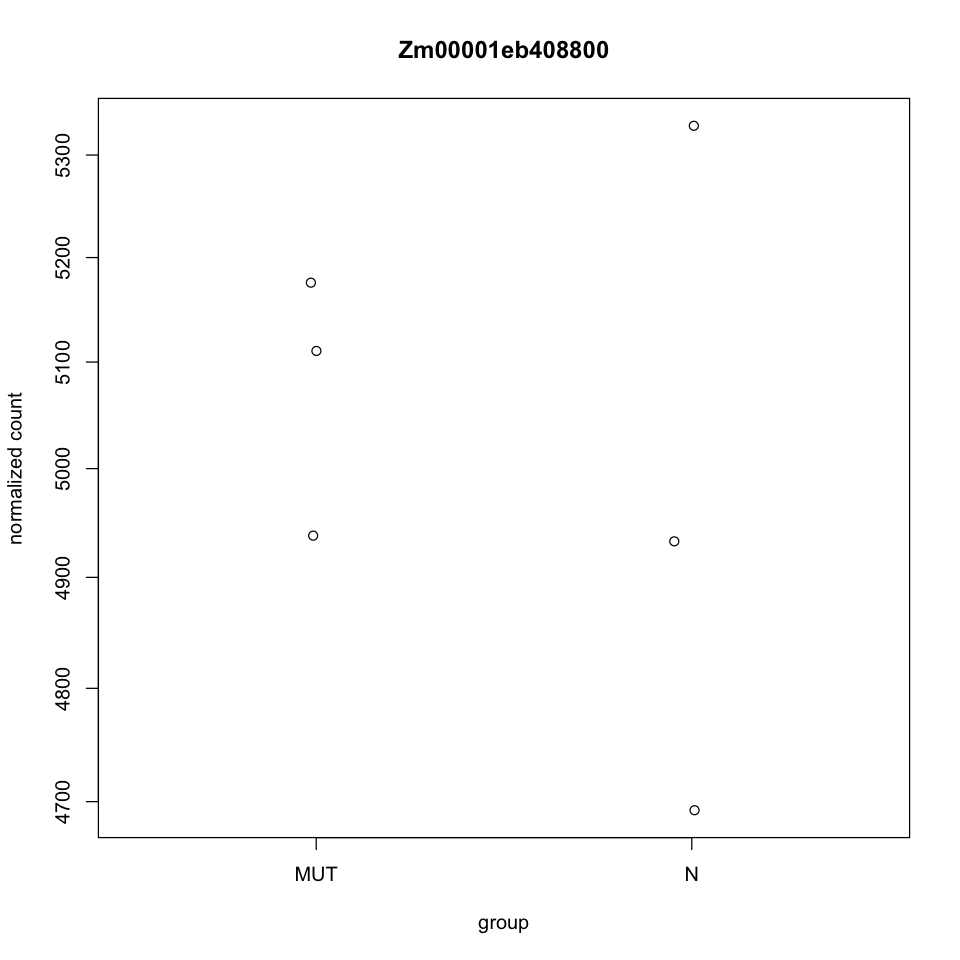

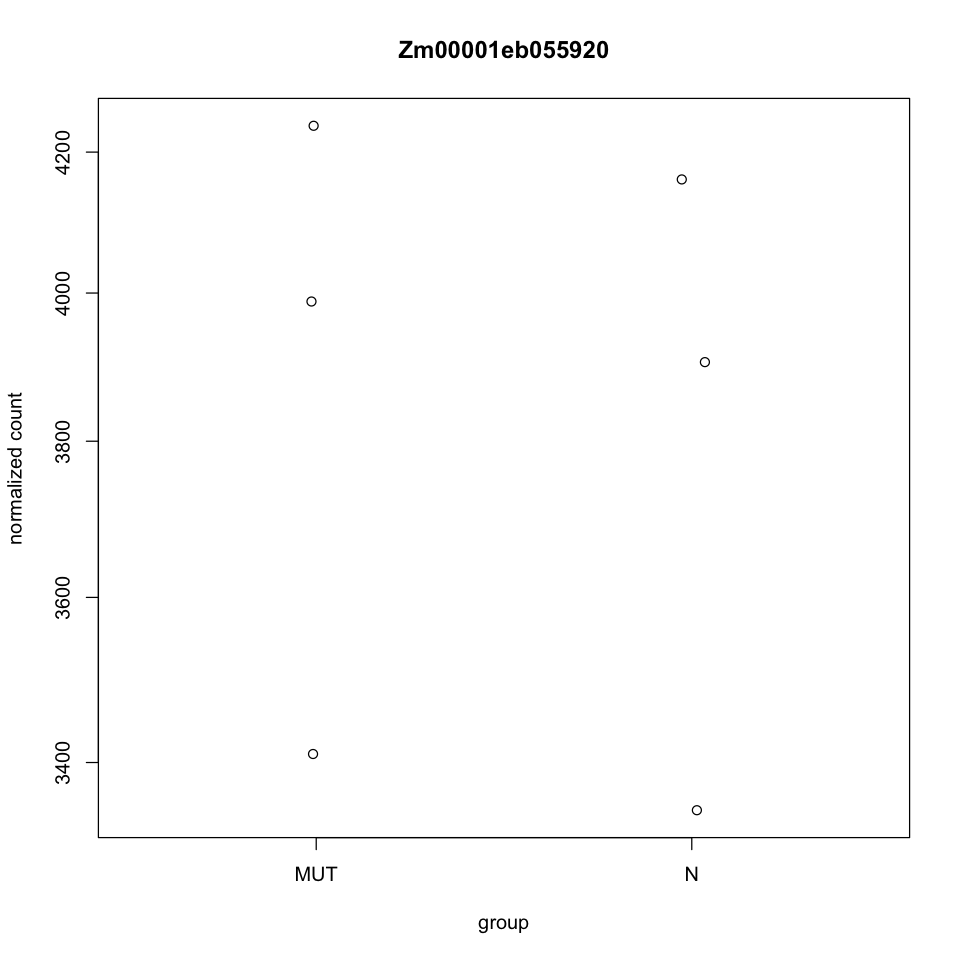

In [115]:
"Counts of ARF28"
plotCounts(dds, gene="Zm00001eb408800", intgroup="Geno")

"Counts of KN1"
plotCounts(dds, gene="Zm00001eb055920", intgroup="Geno")
 

In [116]:
# Let's try GO term analysis on the sigDE genes 
# We will use GoSeq toolkit to carryout the GO term enrichment anlaysis using the maize GAMR annotations
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("goseq")
library (goseq)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.21.1), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'goseq'”
Old packages: 'abind', 'anytime', 'ape', 'aplot', 'askpass', 'backports',
  'bayesm', 'BiasedUrn', 'BiocManager', 'bit', 'bit64', 'bitops', 'brew',
  'brio', 'broom', 'bslib', 'cachem', 'callr', 'capushe', 'car', 'caTools',
  'classInt', 'clue', 'clusterProfiler', 'colorRamps', 'commonmark',
  'compositions', 'config', 'corrplot', 'covr', 'cpp11', 'crayon',
  'credentials', 'crosstalk', 'curl', 'data.table', 'DBI', 'deldir',
  'dendextend', 'DEoptimR', 'desc', 'digest', 'DOSE', 'dotCall64', 'downlit',
  'DT', 'e1071', 'emmeans', 'enrichplot', 'estimability', 'evaluate',
  'FactoMineR', 'f

In [117]:
# GoSeq requires specific input tables : 
#(1) gene vector which has gene name plus 0 or 1 if sigDE, (gene | value)
#(2) gene lengths vector which has the gene length for every gene (gene | length)
# (3) GO annotations for every gene 

# First need to generate a table with all of the genes in 1 column and then either 1 for DE or 0 for not DE in a second column
# extract gene list 
# First extract a list of all of the genes in the dataset - this is in the counts file 
dim(counts)
counts_rownames <- rownames(counts)
assayed.genes <- counts_rownames#genes [1]
dim(assayed.genes)

[1] 39756     6

NULL

In [118]:
# Explore all sigDE genes regardless of fold change
dim(sigDE) # This is the table of all genes with DE padj <0.05

[1] 2956    6

In [119]:
# Then extract a list of all of the sigDE gene names from sigDE (all genes with adj<0.05)
dim(sigDE)
sigDE_rownames <- rownames(sigDE)
de.genes <- sigDE_rownames
dim(de.genes)

# Then create. a vector that has gene names associated with 1 or 0 based on if they are in both of the above lists 
gene.vector=as.integer(assayed.genes%in%de.genes)
names(gene.vector)=assayed.genes
head(gene.vector)


[1] 2956    6

NULL

Zm00001eb000010 Zm00001eb000020 Zm00001eb000050 Zm00001eb000060 Zm00001eb000070 
              0               0               0               0               0 
Zm00001eb000080 
              1

In [120]:
# Need to make a gene length file - this info is in column 6 of the featureCounts file
featureCounts <- read.table(file_paths[1], sep="\t", header=T) # start by reading the first file
lengths <- cbind(featureCounts[,6]) # take the 6th column (counts)
rownames(lengths) <- featureCounts[,1] # name by gene

colnames(lengths) <- c('gene.length') # name the first column

head(lengths) # check on the data
dim(featureCounts) # before
dim(lengths) # after

#Remove the "gene:" from the start of the gene names 
 #head( sub("gene:", "", rownames(counts)) )
rownames(lengths) <- sub("gene:", "", rownames(lengths))
head(lengths)

# Format lengths to be like genes.vector
# First need to generate a table with all of the genes in 1 column and then either 1 for DE or 0 for not DE in a second column
#extract gene list 
 #get rownames 
lengths_rownames <- rownames (lengths)
head(lengths_rownames)
#convert rownames to column
gene.lengths <- cbind(rownames(lengths), data.frame(lengths, row.names=NULL))
head(gene.lengths)

head(gene.lengths)

# Convert the table to a named vector list
library(tibble)
gene.lengths.vector <- deframe(gene.lengths)
head(gene.lengths.vector)

,gene.length
Zm00001eb000010,3615
Zm00001eb000020,3318
Zm00001eb000050,1077
Zm00001eb000060,966
Zm00001eb000070,774
Zm00001eb000080,1738


[1] 39756     7

[1] 39756     1

,gene.length
Zm00001eb000010,3615
Zm00001eb000020,3318
Zm00001eb000050,1077
Zm00001eb000060,966
Zm00001eb000070,774
Zm00001eb000080,1738


[1] "Zm00001eb000010" "Zm00001eb000020" "Zm00001eb000050" "Zm00001eb000060"
[5] "Zm00001eb000070" "Zm00001eb000080"

,rownames(lengths),gene.length
,<chr>,<int>
1,Zm00001eb000010,3615
2,Zm00001eb000020,3318
3,Zm00001eb000050,1077
4,Zm00001eb000060,966
5,Zm00001eb000070,774
6,Zm00001eb000080,1738


,rownames(lengths),gene.length
,<chr>,<int>
1,Zm00001eb000010,3615
2,Zm00001eb000020,3318
3,Zm00001eb000050,1077
4,Zm00001eb000060,966
5,Zm00001eb000070,774
6,Zm00001eb000080,1738


Zm00001eb000010 Zm00001eb000020 Zm00001eb000050 Zm00001eb000060 Zm00001eb000070 
           3615            3318            1077             966             774 
Zm00001eb000080 
           1738

Warning message in pcls(G):
“initial point very close to some inequality constraints”


,DEgenes,bias.data,pwf
,<int>,<int>,<dbl>
Zm00001eb000010,0,3615,0.11568062
Zm00001eb000020,0,3318,0.10754986
Zm00001eb000050,0,1077,0.06224058
Zm00001eb000060,0,966,0.05652464
Zm00001eb000070,0,774,0.04611481
Zm00001eb000080,1,1738,0.08994725


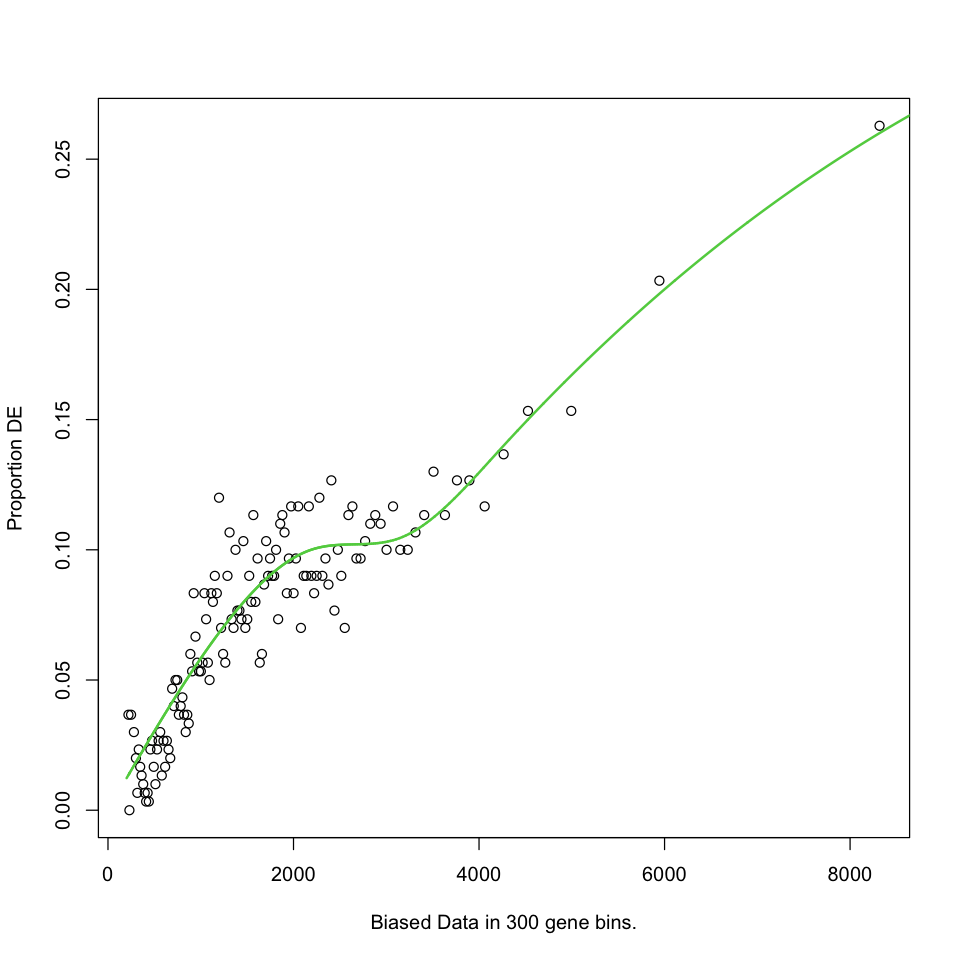

In [121]:
#To begin the analysis, goseq first needs to quantify the length bias present in the dataset under
#consideration. This is done by calculating a Probability Weighting Function or PWF which can
#be thought of as a function which gives the probability that a gene will be differentially expressed
#(DE), based on its length alone. The PWF is calculated by fitting a monotonic spline to the binary
#data series of differential expression (1=DE, 0=Not DE) as a function of gene length. The PWF is
#used to weight the chance of selecting each gene when forming a null distribution for GO category
#membership. 
# nullp(DEgenes, genome, id, bias.data=NULL,plot.fit=TRUE)
options(repr.plot.width=8, repr.plot.height=8)
pwf=nullp(gene.vector, bias.data=gene.lengths.vector,plot.fit=TRUE)
head(pwf)

In [122]:
# Next need to get the GO terms associated with the gene names for the maize NAM5 genome 
# Used GO terms from maize-PANNZER GO in maize-GAMER 
# downloaded 3.1_B73v5.MaizeGDB.CLEANED.gaf from https://datacommons.cyverse.org/browse/iplant/home/shared/commons_repo/curated/Carolyn_Lawrence_Dill_GOMAP_Maize_MaizeGDB_B73_NAM_5.0_December_2021.r1/3_final-result/3.1_B73v5.MaizeGDB.CLEANED.gaf.gz
# Load the GAF file (needed ot first remove the first line which just states the version of gaf file it is using text editor )
maizeGO<-read.table("/Users/aricha14/Documents/Databases/Maize_GAMER_GO terms/3.1_B73v5.MaizeGDB.CLEANED.gaf", header=TRUE, sep='\t')
head(maizeGO)

,X.db,db_object_id,db_object_symbol,qualifier,term_accession,db_reference,evidence_code,with,aspect,db_object_name,db_object_synonym,db_object_type,taxon,date,assigned_by,annotation_extension,gene_product_form_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,MaizeGDB_maize,Zm00001eb000010,Zm00001eb000010,,GO:0003690,GOMAP:0000,IEA,,F,NA,NA,gene,taxon:4577,20211230,GOMAP_v1.3.8,,Zm00001eb000010
2,MaizeGDB_maize,Zm00001eb000010,Zm00001eb000010,,GO:0003727,GOMAP:0000,IEA,RBH:I1IST9,F,NA,NA,gene,taxon:4577,20211215,GOMAP_v1.3.8,,Zm00001eb000010
3,MaizeGDB_maize,Zm00001eb000010,Zm00001eb000010,,GO:0019843,GOMAP:0000,IEA,RBH:I1IST9,F,NA,NA,gene,taxon:4577,20211215,GOMAP_v1.3.8,,Zm00001eb000010
4,MaizeGDB_maize,Zm00001eb000010,Zm00001eb000010,,GO:0005739,GOMAP:0000,IEA,RBH:AT1G78930,C,NA,NA,gene,taxon:4577,20211215,GOMAP_v1.3.8,,Zm00001eb000010
5,MaizeGDB_maize,Zm00001eb000010,Zm00001eb000010,,GO:0009507,GOMAP:0000,IEA,RBH:AT1G78930,C,NA,NA,gene,taxon:4577,20211215,GOMAP_v1.3.8,,Zm00001eb000010
6,MaizeGDB_maize,Zm00001eb000010,Zm00001eb000010,,GO:0006355,GOMAP:0000,IEA,,P,NA,NA,gene,taxon:4577,20211230,GOMAP_v1.3.8,,Zm00001eb000010


In [123]:
# Generate the GO category list 
# extract column 2 and 4 from the maizeGO table 
GO<-data.frame(maizeGO$db_object_id,maizeGO$term_accession)
head(GO)
# Let's export this table for future use 
#export as TSV
write.table(as.data.frame(GO), 
            file="./Maize_GAMR_GO_list_NAM5.txt",
            sep="\t", quote=F)

,maizeGO.db_object_id,maizeGO.term_accession
,<chr>,<chr>
1,Zm00001eb000010,GO:0003690
2,Zm00001eb000010,GO:0003727
3,Zm00001eb000010,GO:0019843
4,Zm00001eb000010,GO:0005739
5,Zm00001eb000010,GO:0009507
6,Zm00001eb000010,GO:0006355


In [124]:
# Now we have ajusted bias based on gene lengths (pwf) and have an appropriately formatted GO list
# we can run the enrichment test using goseq
GO.wall = goseq(pwf, gene2cat = GO, method = "Wallenius", repcnt = 2000, use_genes_without_cat=FALSE)
GO.wall

Using manually entered categories.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns



,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
2830,GO:0009611,4.042027e-28,1,164,789,response to wounding,BP
2750,GO:0009414,2.808885e-23,1,141,659,response to water deprivation,BP
3235,GO:0010200,6.624350e-23,1,152,768,response to chitin,BP
4600,GO:0022625,3.224084e-19,1,55,225,cytosolic large ribosomal subunit,CC
612,GO:0003735,5.574268e-19,1,120,823,structural constituent of ribosome,MF
2923,GO:0009743,2.423668e-16,1,127,688,response to carbohydrate,BP
6061,GO:0042538,8.338899e-16,1,74,306,hyperosmotic salinity response,BP
3370,GO:0010363,1.133047e-15,1,123,630,regulation of plant-type hypersensitive response,BP
1856,GO:0006612,7.140293e-15,1,119,613,protein targeting to membrane,BP


In [125]:
# Find statistically enriched GO terms 
enriched.GO=GO.wall$category[p.adjust(GO.wall$over_represented_pvalue, method="BH")<.05]
enriched.GO
length(enriched.GO)

[1] "GO:0009611" "GO:0009414" "GO:0010200" "GO:0022625" "GO:0003735"
  [6] "GO:0009743" "GO:0042538" "GO:0010363" "GO:0006612" "GO:0009867"
 [11] "GO:0009753" "GO:0009695" "GO:0022627" "GO:0009409" "GO:0009963"
 [16] "GO:0005886" "GO:0009506" "GO:0051704" "GO:0080167" "GO:0009620"
 [21] "GO:0009651" "GO:0009862" "GO:1900378" "GO:0001510" "GO:0009737"
 [26] "GO:0050832" "GO:0010075" "GO:0009664" "GO:2000762" "GO:0042742"
 [31] "GO:0006575" "GO:0002679" "GO:2000026" "GO:0009738" "GO:0031328"
 [36] "GO:0009873" "GO:0042398" "GO:0010310" "GO:0048767" "GO:0044283"
 [41] "GO:0009733" "GO:0070838" "GO:0009723" "GO:0009644" "GO:0031348"
 [46] "GO:2000022" "GO:0048046" "GO:0043900" "GO:0010114" "GO:0048653"
 [51] "GO:1903507" "GO:0008152" "GO:0005634" "GO:0042788" "GO:0009637"
 [56] "GO:0009773" "GO:0030003" "GO:0035304" "GO:0005618" "GO:0009744"
 [61] "GO:0008361" "GO:0006259" "GO:0009718" "GO:0000165" "GO:0009657"
 [66] "GO:0006334" "GO:0009266" "GO:0048569" "GO:0048646" "GO:0010167"
 [71] "GO:0009809" "GO:0042555" "GO:0005506" "GO:0009595" "GO:0006412"
 [76] "GO:0006833" "GO:0042545" "GO:0009825" "GO:0016761" "GO:0009815"
 [81] "GO:0010286" "GO:0009538" "GO:0055114" "GO:0004674" "GO:0046274"
 [86] "GO:0015824" "GO:0005576" "GO:0009505" "GO:0030968" "GO:0042542"
 [91] "GO:0009978" "GO:0019373" "GO:0047987" "GO:0009617" "GO:0031408"
 [96] "GO:0010207" "GO:0007623" "GO:0007389" "GO:0006598" "GO:0050253"
[101] "GO:0048527" "GO:0080116" "GO:0009739" "GO:0043069" "GO:0009913"
[106] "GO:0015804" "GO:0009834" "GO:0016138" "GO:0006972" "GO:0009751"
[111] "GO:0006984" "GO:0003700" "GO:0071555" "GO:0005730" "GO:0071277"
[116] "GO:0009697" "GO:0046686" "GO:0080030" "GO:0080031" "GO:0080032"
[121] "GO:0009699" "GO:0009693" "GO:0015175" "GO:0033383" "GO:0006351"
[126] "GO:0010218" "GO:0009805" "GO:0009932" "GO:0002181" "GO:0003825"
[131] "GO:0009835" "GO:0007626" "GO:0010417" "GO:0097305" "GO:0052716"
[136] "GO:0052542" "GO:2000068" "GO:0009416" "GO:0009646"

[1] 139

In [126]:
#Need to add a new column with adjusted pvalues for over-represented GO terms 
library(dplyr)
GO.wall.padj<-GO.wall
GO.wall.padj <- (GO.wall.padj %>% mutate (padj = (p.adjust(GO.wall.padj$over_represented_pvalue, method="BH")) )) # add a column to the full gene table with GO terms to add the GO term padj value 
dim(GO.wall.padj)
head(GO.wall.padj)
# Next filter these for significantly enriched 
GO.enriched <- subset (GO.wall.padj, padj <0.05)
dim(GO.enriched)
head(GO.enriched)

#export as TSV
write.table(GO.enriched, 
            file="./TrfVsN_NAM5_HiSAT_RNAseq_enrichedGOterms_allsigDEgenes_may2022.txt",
            sep="\t", quote=F)

[1] 9345    8

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology,padj
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>
2830,GO:0009611,4.042027e-28,1,164,789,response to wounding,BP,3.777274e-24
2750,GO:0009414,2.808885e-23,1,141,659,response to water deprivation,BP,1.312452e-19
3235,GO:0010200,6.624350e-23,1,152,768,response to chitin,BP,2.063485e-19
4600,GO:0022625,3.224084e-19,1,55,225,cytosolic large ribosomal subunit,CC,7.532267e-16
612,GO:0003735,5.574268e-19,1,120,823,structural constituent of ribosome,MF,1.041831e-15
2923,GO:0009743,2.423668e-16,1,127,688,response to carbohydrate,BP,3.774863e-13


[1] 139   8

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology,padj
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>
2830,GO:0009611,4.042027e-28,1,164,789,response to wounding,BP,3.777274e-24
2750,GO:0009414,2.808885e-23,1,141,659,response to water deprivation,BP,1.312452e-19
3235,GO:0010200,6.624350e-23,1,152,768,response to chitin,BP,2.063485e-19
4600,GO:0022625,3.224084e-19,1,55,225,cytosolic large ribosomal subunit,CC,7.532267e-16
612,GO:0003735,5.574268e-19,1,120,823,structural constituent of ribosome,MF,1.041831e-15
2923,GO:0009743,2.423668e-16,1,127,688,response to carbohydrate,BP,3.774863e-13


,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology,padj
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>
2830,GO:0009611,4.042027e-28,1,164,789,response to wounding,BP,3.777274e-24
2750,GO:0009414,2.808885e-23,1,141,659,response to water deprivation,BP,1.312452e-19
3235,GO:0010200,6.624350e-23,1,152,768,response to chitin,BP,2.063485e-19
2923,GO:0009743,2.423668e-16,1,127,688,response to carbohydrate,BP,3.774863e-13
6061,GO:0042538,8.338899e-16,1,74,306,hyperosmotic salinity response,BP,1.113243e-12
3370,GO:0010363,1.133047e-15,1,123,630,regulation of plant-type hypersensitive response,BP,1.323540e-12


[1] 106   8

[1] "response to wounding"                                                   
  [2] "response to water deprivation"                                          
  [3] "response to chitin"                                                     
  [4] "response to carbohydrate"                                               
  [5] "hyperosmotic salinity response"                                         
  [6] "regulation of plant-type hypersensitive response"                       
  [7] "protein targeting to membrane"                                          
  [8] "jasmonic acid mediated signaling pathway"                               
  [9] "response to jasmonic acid"                                              
 [10] "jasmonic acid biosynthetic process"                                     
 [11] "response to cold"                                                       
 [12] "positive regulation of flavonoid biosynthetic process"                  
 [13] "response to karrikin"                                                   
 [14] "response to fungus"                                                     
 [15] "response to salt stress"                                                
 [16] "systemic acquired resistance, salicylic acid mediated signaling pathway"
 [17] "positive regulation of secondary metabolite biosynthetic process"       
 [18] "RNA methylation"                                                        
 [19] "response to abscisic acid"                                              
 [20] "defense response to fungus"                                             
 [21] "regulation of meristem growth"                                          
 [22] "plant-type cell wall organization"                                      
 [23] "regulation of phenylpropanoid metabolic process"                        
 [24] "defense response to bacterium"                                          
 [25] "cellular modified amino acid metabolic process"                         
 [26] "respiratory burst involved in defense response"                         
 [27] "regulation of multicellular organismal development"                     
 [28] "abscisic acid-activated signaling pathway"                              
 [29] "positive regulation of cellular biosynthetic process"                   
 [30] "ethylene-activated signaling pathway"                                   
 [31] "cellular modified amino acid biosynthetic process"                      
 [32] "regulation of hydrogen peroxide metabolic process"                      
 [33] "root hair elongation"                                                   
 [34] "small molecule biosynthetic process"                                    
 [35] "response to auxin"                                                      
 [36] "response to ethylene"                                                   
 [37] "response to high light intensity"                                       
 [38] "negative regulation of defense response"                                
 [39] "regulation of jasmonic acid mediated signaling pathway"                 
 [40] "response to red light"                                                  
 [41] "anther development"                                                     
 [42] "negative regulation of nucleic acid-templated transcription"            
 [43] "metabolic process"                                                      
 [44] "response to blue light"                                                 
 [45] "photosynthetic electron transport in photosystem I"                     
 [46] "intracellular monoatomic cation homeostasis"                            
 [47] "regulation of protein dephosphorylation"                                
 [48] "response to sucrose"                                                    
 [49] "regulation of cell size"                                                
 [50] "DNA metabolic process"                                                  
 [

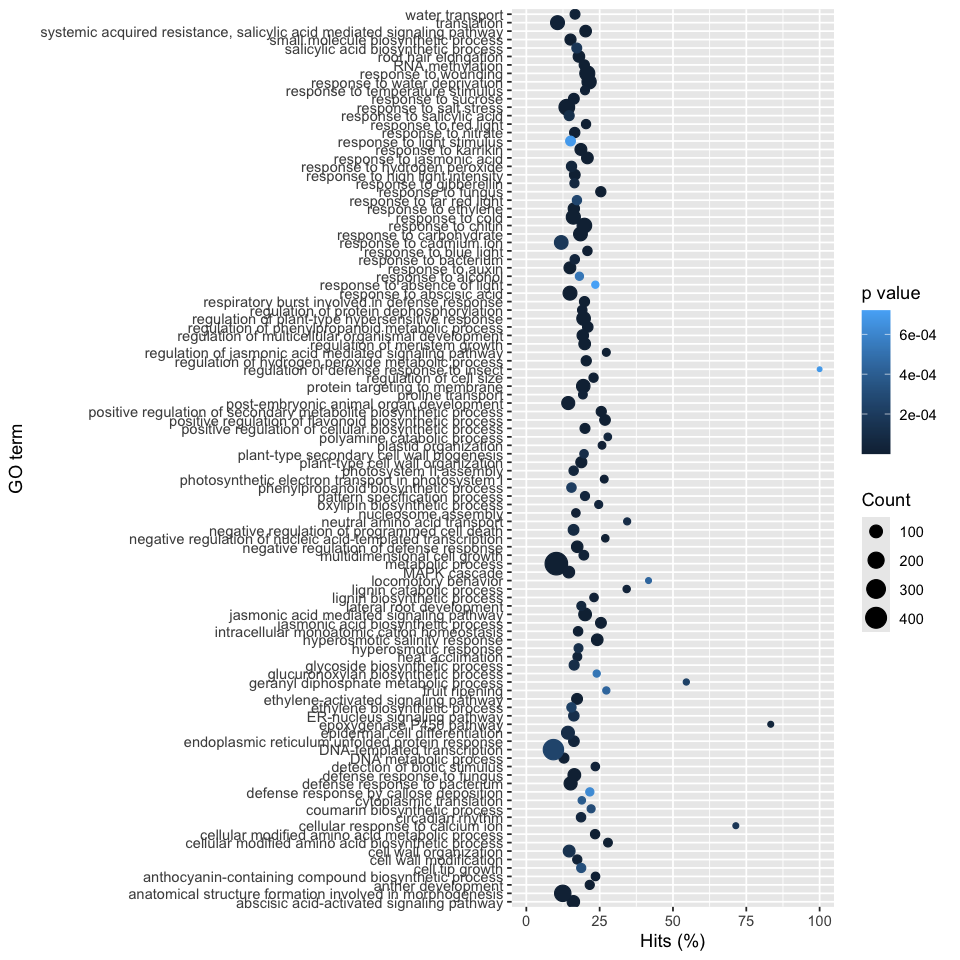

In [127]:
library(ggplot2)
BP<- subset (GO.enriched, ontology=="BP")
head(BP)
dim(BP)
unique ( BP$term )
BP %>% 
    top_n(110, wt=-over_represented_pvalue) %>% 
    mutate(hitsPerc=numDEInCat*100/numInCat) %>% 
    ggplot(aes(x=hitsPerc, 
               y=term, 
               colour=over_represented_pvalue, 
               size=numDEInCat)) +
        geom_point() +
        expand_limits(x=0) +
        labs(x="Hits (%)", y="GO term", colour="p value", size="Count")

In [128]:
dim(BP)
H<- BP %>% filter(grepl('jasmonic|salicylic|gibberellin|abscisic|auxin|ethylene|brassinosteroid|hormone', term))
dim(H)
summary(H)


[1] 106   8

[1] 14  8

   category         over_represented_pvalue under_represented_pvalue
 Length:14          Min.   :0.000e+00       Min.   :0.9999          
 Class :character   1st Qu.:2.500e-10       1st Qu.:1.0000          
 Mode  :character   Median :6.041e-08       Median :1.0000          
                    Mean   :4.105e-05       Mean   :1.0000          
                    3rd Qu.:5.102e-05       3rd Qu.:1.0000          
                    Max.   :2.268e-04       Max.   :1.0000          
   numDEInCat        numInCat         term             ontology        
 Min.   : 18.00   Min.   : 66.0   Length:14          Length:14         
 1st Qu.: 43.50   1st Qu.:233.5   Class :character   Class :character  
 Median : 64.00   Median :353.0   Mode  :character   Mode  :character  
 Mean   : 65.07   Mean   :375.5                                        
 3rd Qu.: 78.25   3rd Qu.:480.8                                        
 Max.   :131.00   Max.   :880.0                                        
      padj   

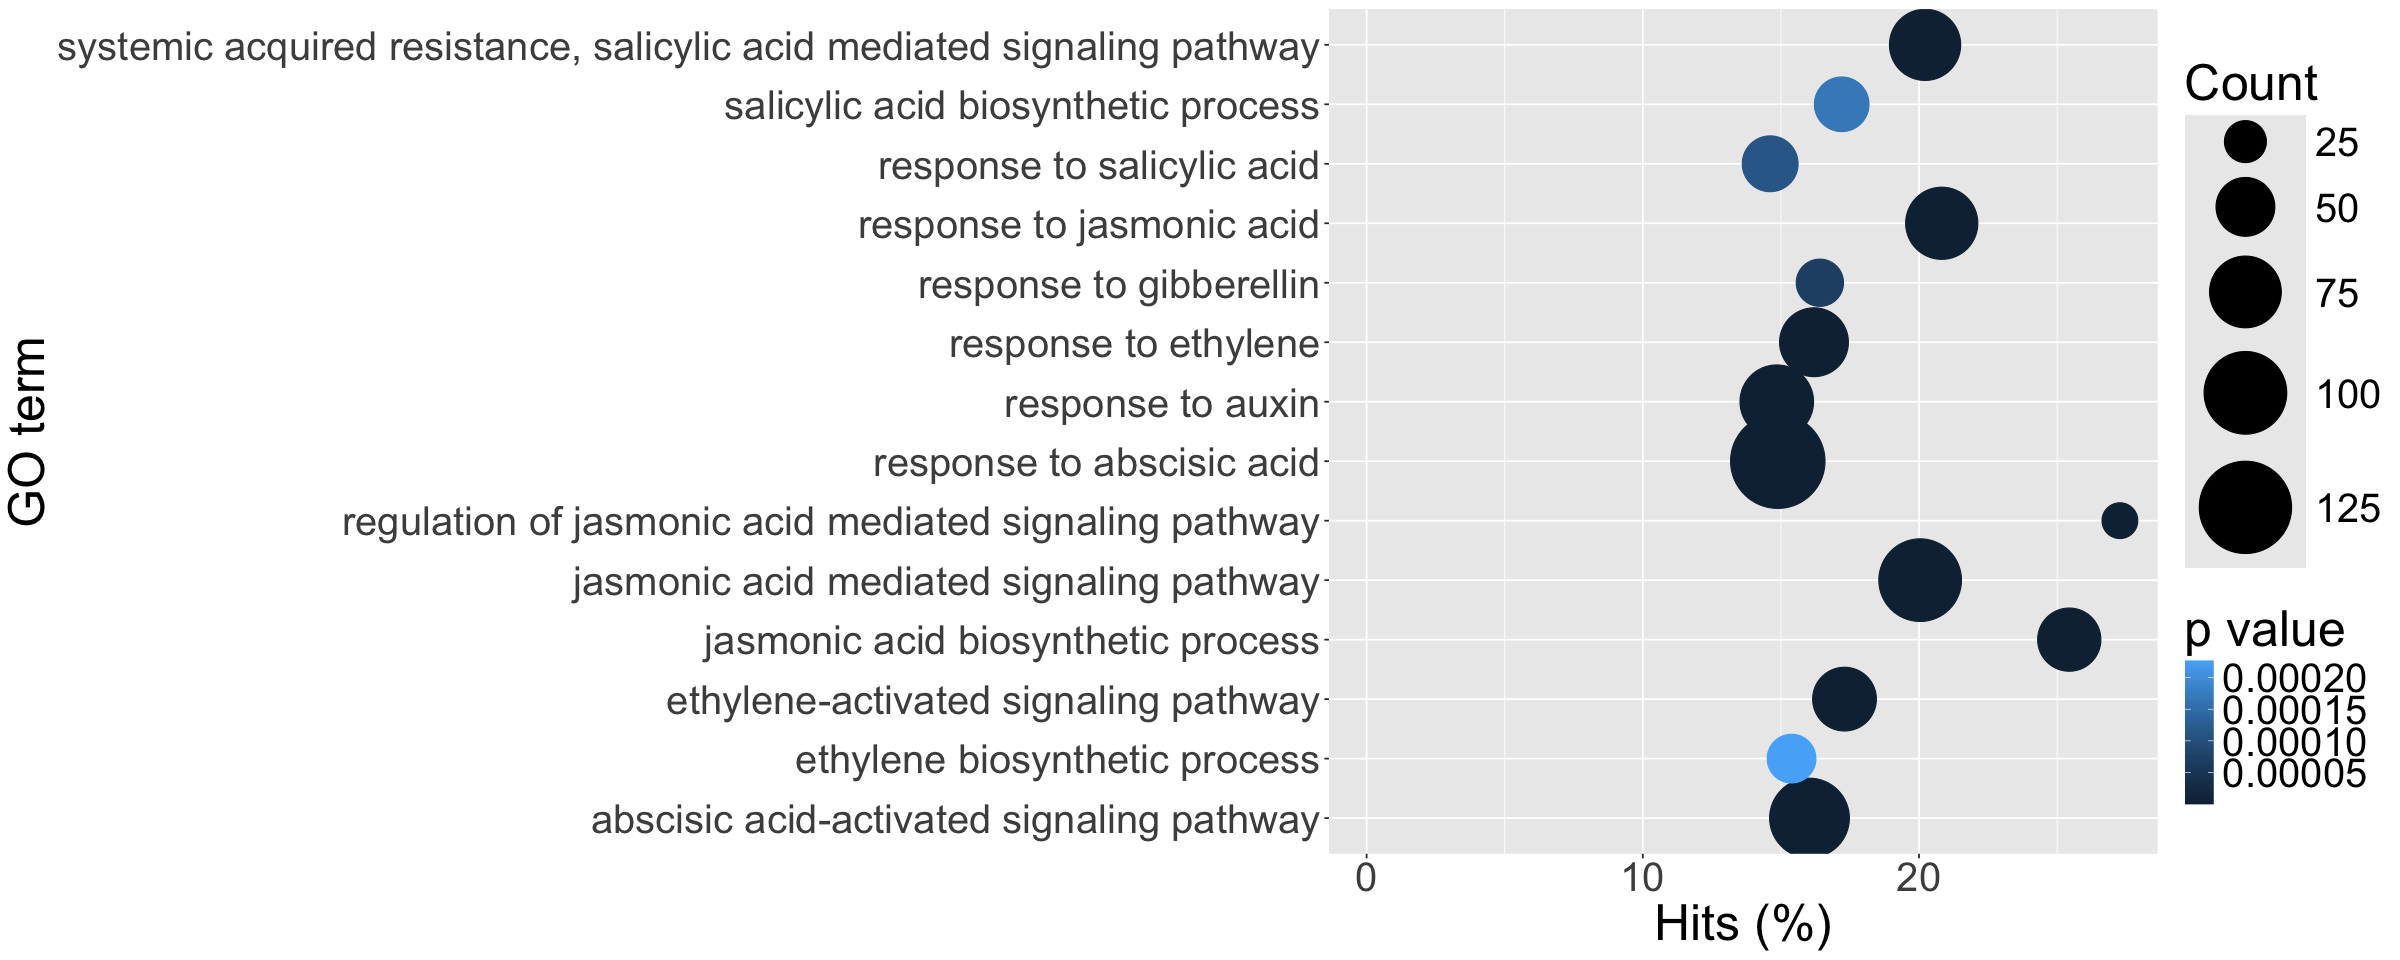

In [129]:

options(repr.plot.width=20, repr.plot.height=8)
p <- H %>% 
    slice_min(n = 20, order_by = over_represented_pvalue) %>% 
    mutate(hitsPerc = numDEInCat * 100 / numInCat) %>% 
    ggplot(aes(x = hitsPerc, 
               y = term, 
               colour = over_represented_pvalue, 
               size = numDEInCat)) +
        geom_point() +
        scale_size_area(max_size = 26.2) +
        expand_limits(x = 0) +
        labs(x = "Hits (%)", y = "GO term", colour = "p value", size = "Count") +
        theme(text = element_text(size = 30))

p

[1] 106   8

[1] 14  8

   category         over_represented_pvalue under_represented_pvalue
 Length:14          Min.   :3.000e-09       Min.   :0.9998          
 Class :character   1st Qu.:1.808e-06       1st Qu.:0.9999          
 Mode  :character   Median :2.226e-05       Median :1.0000          
                    Mean   :9.194e-05       Mean   :1.0000          
                    3rd Qu.:1.281e-04       3rd Qu.:1.0000          
                    Max.   :3.857e-04       Max.   :1.0000          
   numDEInCat        numInCat          term             ontology        
 Min.   : 14.00   Min.   :  52.0   Length:14          Length:14         
 1st Qu.: 32.25   1st Qu.: 150.8   Class :character   Class :character  
 Median : 51.50   Median : 270.0   Mode  :character   Mode  :character  
 Mean   : 85.50   Mean   : 684.4                                        
 3rd Qu.: 78.25   3rd Qu.: 501.2                                        
 Max.   :375.00   Max.   :4060.0                                        
      

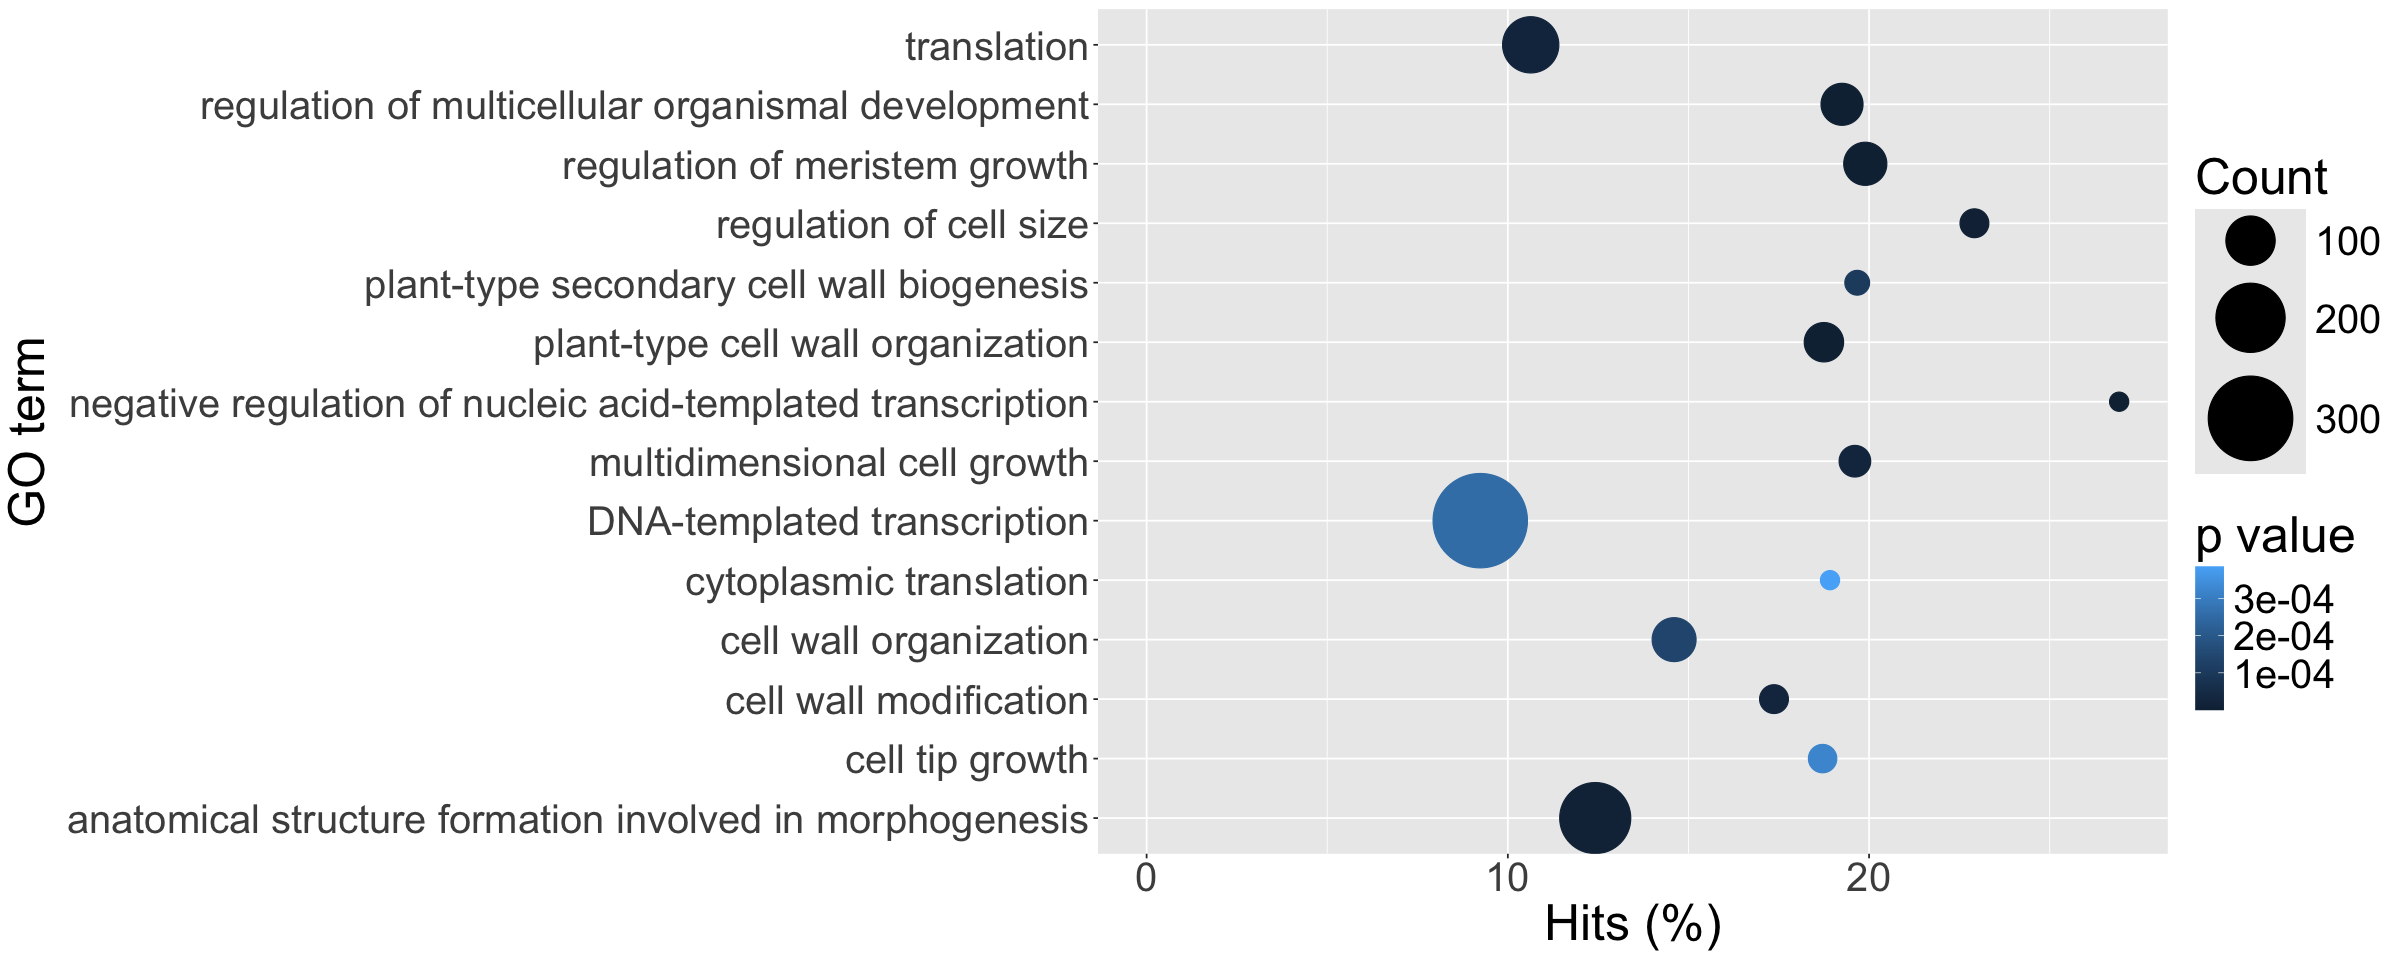

In [130]:
dim(BP)
M<- BP %>% filter(grepl('meristem|leaf|organ|development|transcription|translation|cell size|cell wall|growth|morphogenesis', term))
M<- M %>% filter(!grepl('animal|root|plastid|multi-organism|anther', term))

dim(M)
summary(M)
options(repr.plot.width=20, repr.plot.height=8)
p <- M %>% 
    slice_min(n = 20, order_by = over_represented_pvalue) %>% 
    mutate(hitsPerc = numDEInCat * 100 / numInCat) %>% 
    ggplot(aes(x = hitsPerc, 
               y = term, 
               colour = over_represented_pvalue, 
               size = numDEInCat)) +
        geom_point() +
        scale_size_area(max_size = 26.2) +
        expand_limits(x = 0) +
        labs(x = "Hits (%)", y = "GO term", colour = "p value", size = "Count") +
        theme(text = element_text(size = 30))

p

[1] 106   8

[1] 24  8

   category         over_represented_pvalue under_represented_pvalue
 Length:24          Min.   :0.000e+00       Min.   :0.9998          
 Class :character   1st Qu.:1.380e-08       1st Qu.:0.9999          
 Mode  :character   Median :5.594e-07       Median :1.0000          
                    Mean   :7.209e-05       Mean   :1.0000          
                    3rd Qu.:1.182e-04       3rd Qu.:1.0000          
                    Max.   :3.857e-04       Max.   :1.0000          
   numDEInCat       numInCat          term             ontology        
 Min.   : 14.0   Min.   :  52.0   Length:24          Length:24         
 1st Qu.: 38.5   1st Qu.: 216.8   Class :character   Class :character  
 Median : 66.0   Median : 353.0   Mode  :character   Mode  :character  
 Mean   : 81.0   Mean   : 584.0                                        
 3rd Qu.: 82.5   3rd Qu.: 534.2                                        
 Max.   :375.0   Max.   :4060.0                                        
      padj   

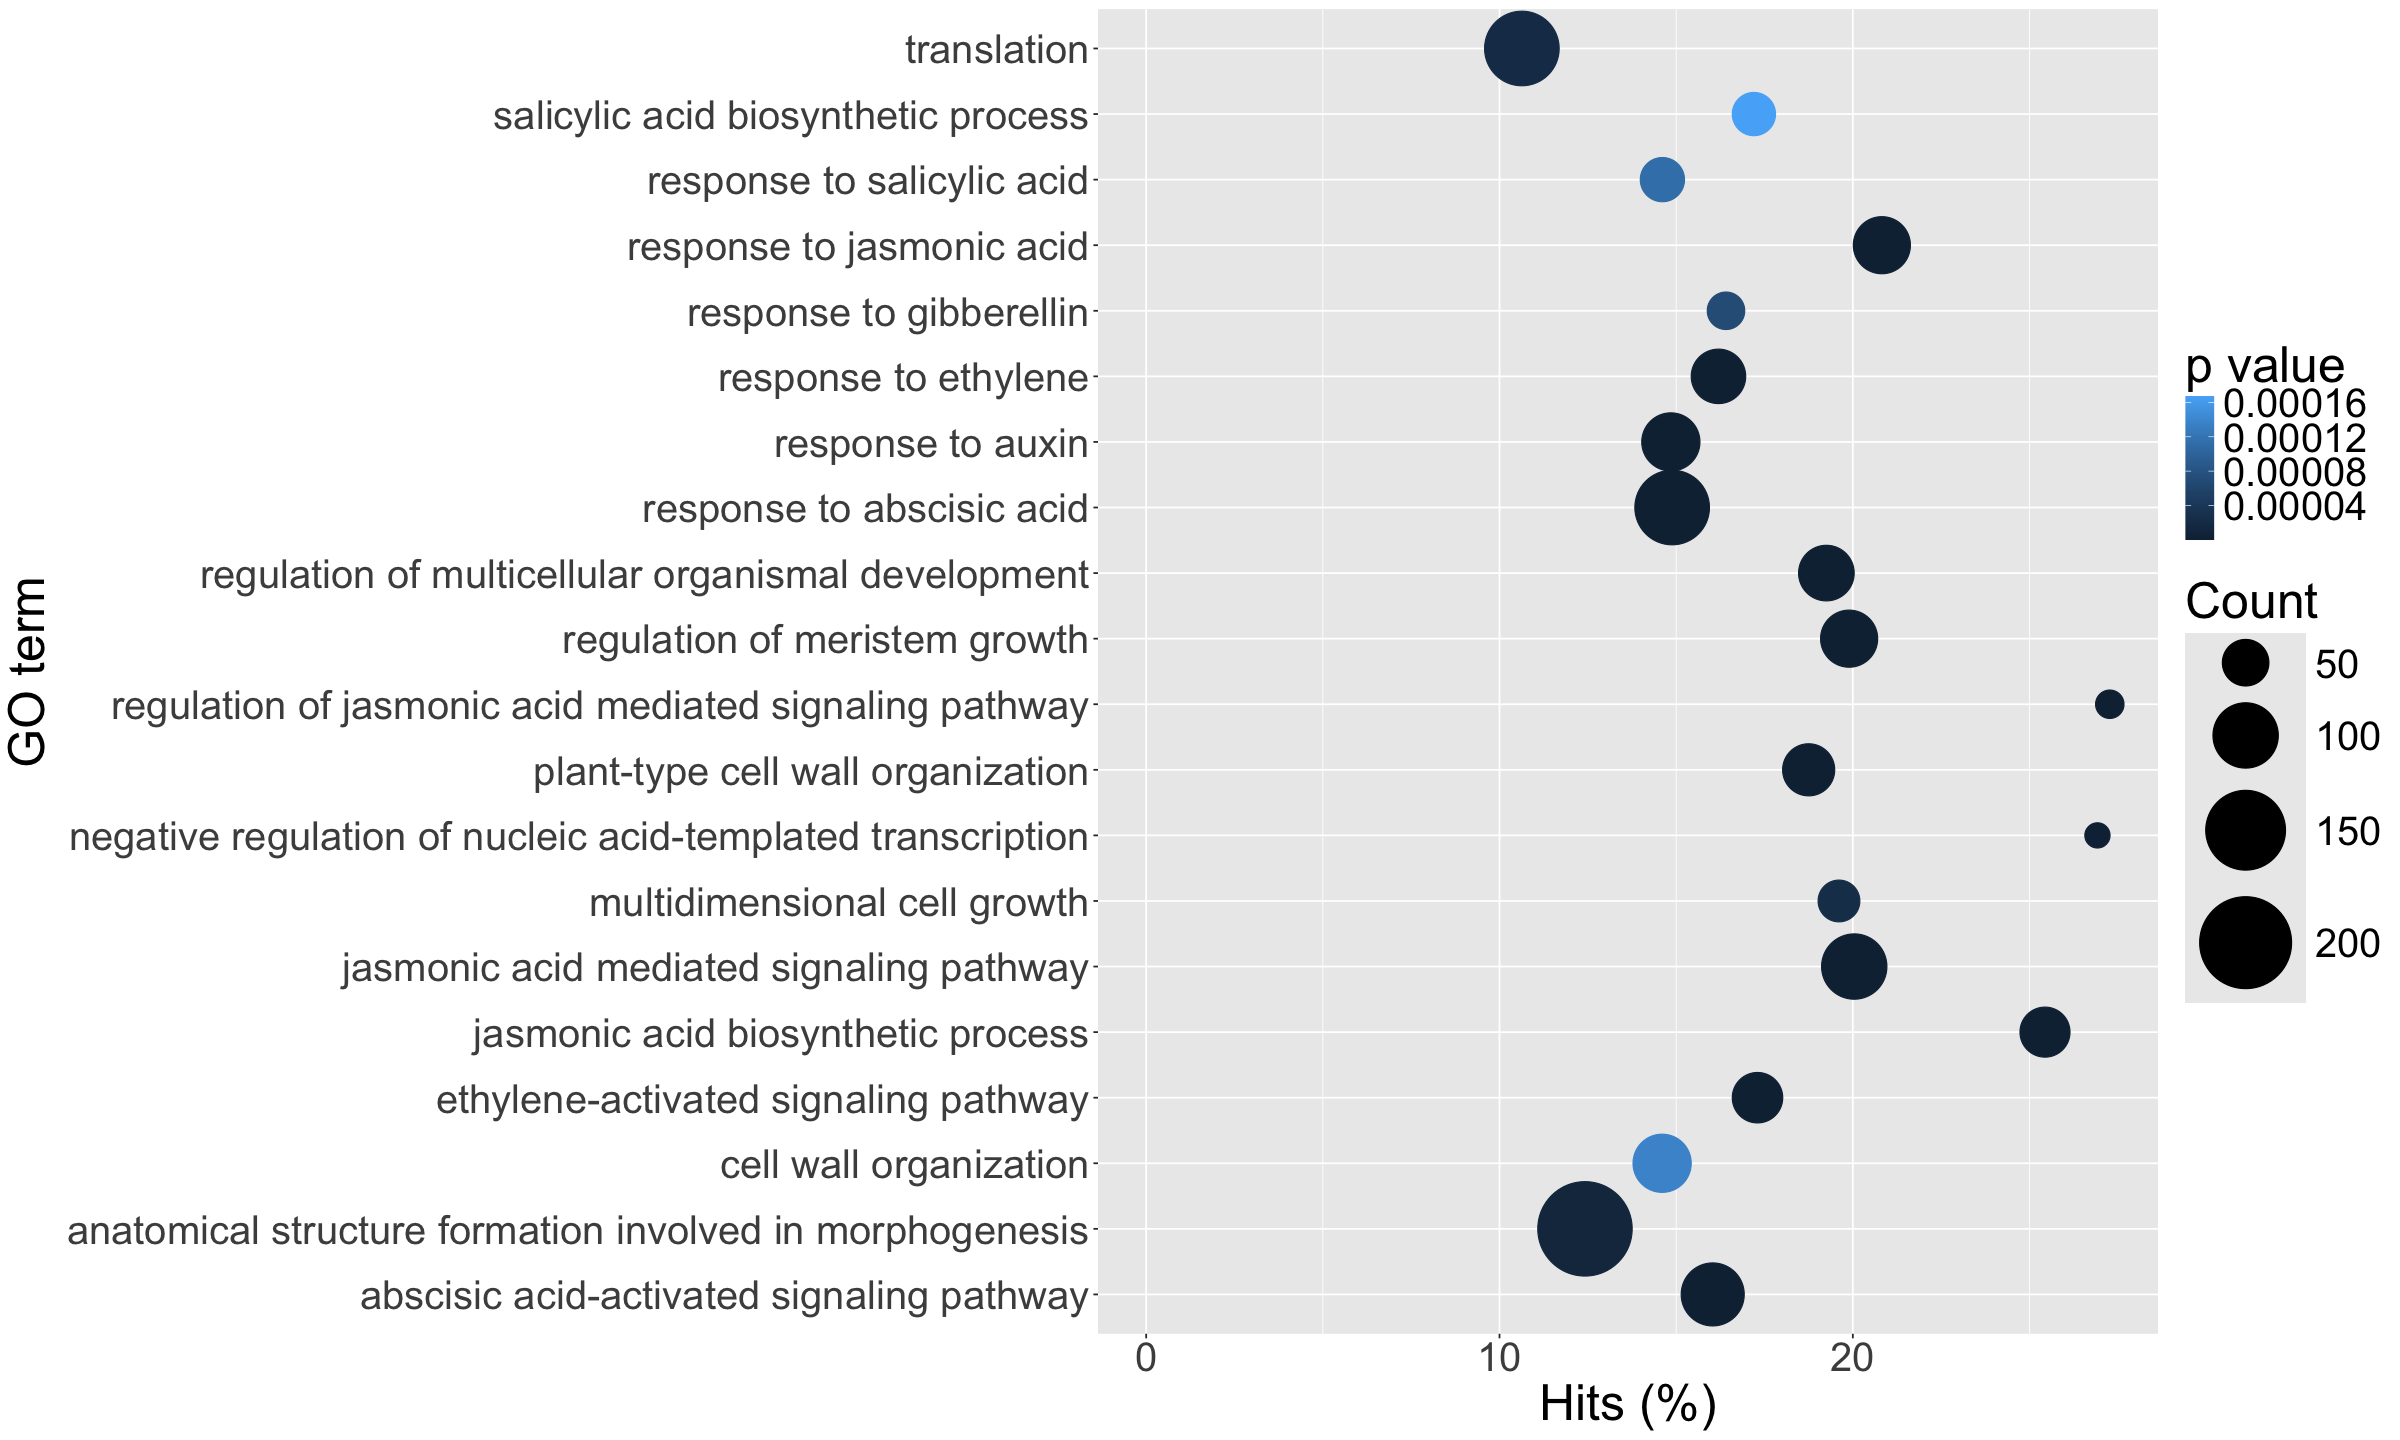

In [131]:
dim(BP)
I<- BP %>% filter(grepl('meristem|leaf|organ|development|transcription|translation|growth|morphogenesis|jasmonic|salicylic|gibberellin|abscisic|auxin|ethylene|brassinosteroid|hormone', term))
I<- I %>% filter(!grepl('animal|root|plastid|multi-organism|anther|systemic acquired resistance, salicylic acid mediated signaling pathway', term))

dim(I)
summary(I)
options(repr.plot.width=20, repr.plot.height=12)
p <- I %>% 
    slice_min(n = 20, order_by = over_represented_pvalue) %>% 
    mutate(hitsPerc = numDEInCat * 100 / numInCat) %>% 
    ggplot(aes(x = hitsPerc, 
               y = term, 
               colour = over_represented_pvalue, 
               size = numDEInCat)) +
        geom_point() +
        scale_size_area(max_size = 26.2) +
        expand_limits(x = 0) +
        labs(x = "Hits (%)", y = "GO term", colour = "p value", size = "Count") +
        theme(text = element_text(size = 30))

p